In [127]:
import sys
from pathlib import Path

#import inspect
#from importlib import reload

import numpy as np
import pandas as pd

import autoNeuro

In [109]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
%autoreload 3

In [11]:
#data_package = r'C:\Users\User\Documents\Skolkovo\projects\Sharjah\Schizophrenia Excel files'
data_path = Path('../../data/schizo_rna_seq')

In [12]:
files = list(data_path.iterdir())

In [13]:
files

[PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.5_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.3_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_unfiltered_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.6_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.4_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.1_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.05_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.01_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_unfiltered_raw.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.2_normalized.xlsx'),
 PosixPath('../../data/schizo_rna_seq/Schizo_filtered0.02_normalized.xlsx')]

In [6]:
%%time
data = {
    fname.stem: pd.read_excel(fname) for fname in files #if fname.stem == 'Schizo_filtered0.6_normalized'
}

CPU times: user 36.8 s, sys: 103 ms, total: 36.9 s
Wall time: 37 s


In [14]:
# check for NaNs
for k, v in data.items():
    print(k, v.isnull().sum().sum())

Schizo_filtered0.5_normalized 0
Schizo_filtered0.3_normalized 0
Schizo_unfiltered_normalized 0
Schizo_filtered0.6_normalized 0
Schizo_filtered0.4_normalized 0
Schizo_filtered0.1_normalized 0
Schizo_filtered0.05_normalized 0
Schizo_filtered0.01_normalized 0
Schizo_unfiltered_raw 0
Schizo_filtered0.2_normalized 0
Schizo_filtered0.02_normalized 0


In [289]:
def process_dataset(data):
    #data = pd.read_excel(filepath)
    
    data = data.T
    data = data.reset_index()
    data.columns = data.iloc[0]
    data = data[2:]
    data = data.drop_duplicates()
    
    data['target'] = data['NAME'].apply(lambda x: x.split("_")[0])
    data['target'] = data['target'].map({'Schizo1':1, 'Ctrl1': 0})
    
    #print(data.select_dtypes(include=['object']))
    
    y = data['target'].copy().reset_index(drop=True)
    names = data['NAME'].copy()
    X = data.iloc[:, 1: -1].reset_index(drop=True).astype(np.float64)
    
    return X, y, names

In [290]:
%%time
processed = {
    fname: process_dataset(df) for fname, df in data.items()
}

CPU times: user 7.08 s, sys: 248 ms, total: 7.33 s
Wall time: 8.16 s


In [291]:
for k in sorted(processed.keys(), reverse=True):
    print(k, processed[k][0].shape)

Schizo_unfiltered_raw (72, 20935)
Schizo_unfiltered_normalized (72, 20935)
Schizo_filtered0.6_normalized (72, 3)
Schizo_filtered0.5_normalized (72, 13)
Schizo_filtered0.4_normalized (72, 41)
Schizo_filtered0.3_normalized (72, 106)
Schizo_filtered0.2_normalized (72, 387)
Schizo_filtered0.1_normalized (72, 2503)
Schizo_filtered0.05_normalized (72, 7480)
Schizo_filtered0.02_normalized (72, 14283)
Schizo_filtered0.01_normalized (72, 16902)


In [20]:
processed.keys()

dict_keys(['Schizo_filtered0.5_normalized', 'Schizo_filtered0.3_normalized', 'Schizo_unfiltered_normalized', 'Schizo_filtered0.6_normalized', 'Schizo_filtered0.4_normalized', 'Schizo_filtered0.1_normalized', 'Schizo_filtered0.05_normalized', 'Schizo_filtered0.01_normalized', 'Schizo_unfiltered_raw', 'Schizo_filtered0.2_normalized', 'Schizo_filtered0.02_normalized'])

In [34]:
sorted(processed.keys(), reverse=True)

['Schizo_unfiltered_raw',
 'Schizo_unfiltered_normalized',
 'Schizo_filtered0.6_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.1_normalized',
 'Schizo_filtered0.05_normalized',
 'Schizo_filtered0.02_normalized',
 'Schizo_filtered0.01_normalized']

In [37]:
filtered = [
  'Schizo_filtered0.6_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.1_normalized',
 'Schizo_filtered0.05_normalized',
]

In [25]:
import time
from datetime import datetime

Start Schizo_filtered0.6_normalized, shape (72, 3)
model_name xgb, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                   

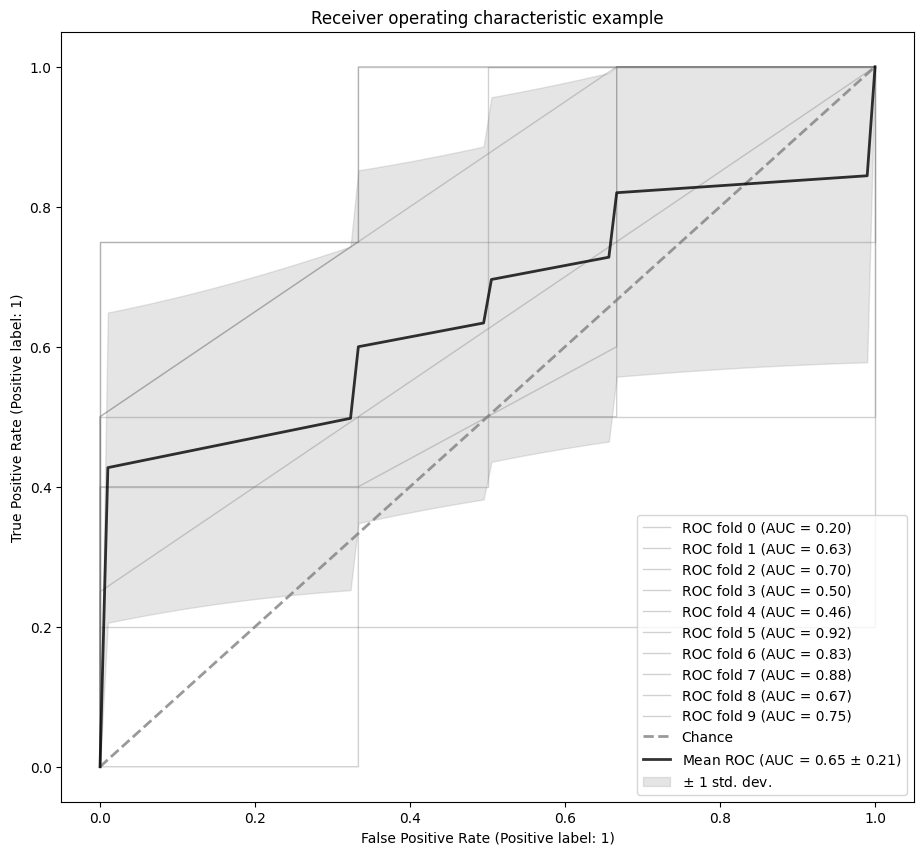

--------------------
______________stats___________________
NEBL
Test normality:  2.608138593984677e-08 3.1243924780710586e-08
Patient:  3.9499311209302315
Control:  2.9334893074074073
Test homogenius: LeveneResult(statistic=3.672242576747095, pvalue=0.05952996859626206)
MannwhitneyuResult(statistic=684.0, pvalue=0.13671154769550853)


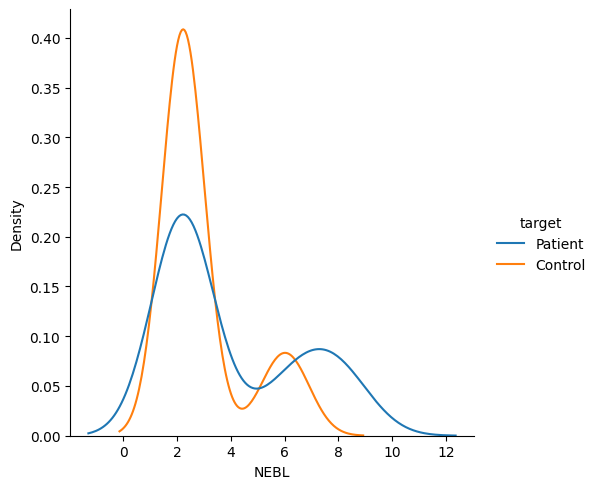

HLA-DRB1
Test normality:  1.2565293694422053e-08 2.174923793063499e-06
Patient:  4.827467232558139
Control:  4.943134477777778
Test homogenius: LeveneResult(statistic=0.016457993004798808, pvalue=0.898299162468871)
MannwhitneyuResult(statistic=558.0, pvalue=0.7845052939116229)


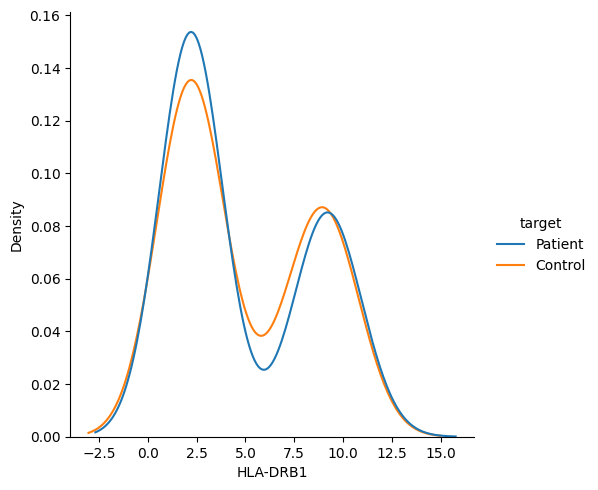

ALAS2
Test normality:  6.919271267058491e-10 2.4599375314515726e-10
Patient:  3.4761219813953486
Control:  2.436861622222222
Test homogenius: LeveneResult(statistic=4.2995939285359634, pvalue=0.041912117087313586)
Ttest_indResult(statistic=2.4956053302377272, pvalue=0.015553320969636637)


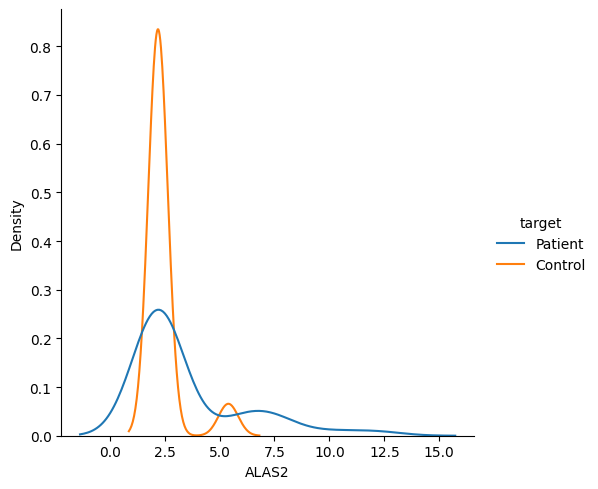

_______________________________________________
Time elapsed, s: 121
Start Schizo_filtered0.5_normalized, shape (72, 13)
model_name xgb, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
             

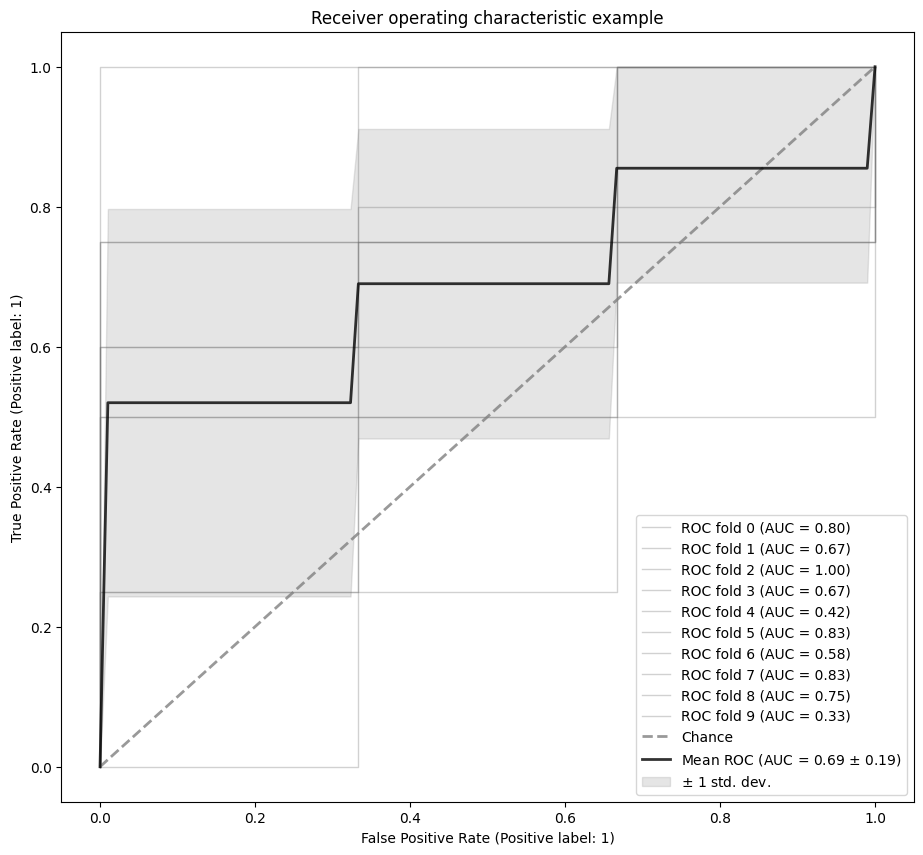

--------------------
______________stats___________________
PTGS2
Test normality:  1.23458517009567e-06 0.0003408843476790935
Patient:  4.01490143488372
Control:  2.7216119518518522
Test homogenius: LeveneResult(statistic=11.021635899500813, pvalue=0.0014503409113707667)
Ttest_indResult(statistic=3.7121616220676534, pvalue=0.0005524172331410339)


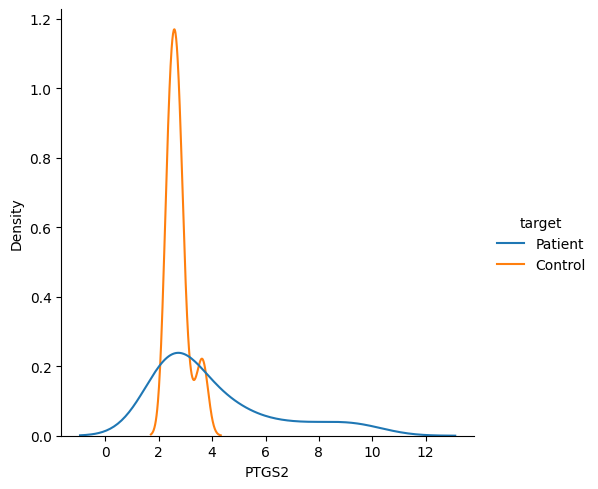

UTS2
Test normality:  1.6662858870475361e-09 4.3089136170237907e-07
Patient:  3.5239603418604655
Control:  3.1600613185185185
Test homogenius: LeveneResult(statistic=1.0710671287002977, pvalue=0.3043710689370497)
MannwhitneyuResult(statistic=504.5, pvalue=0.3607988943853996)


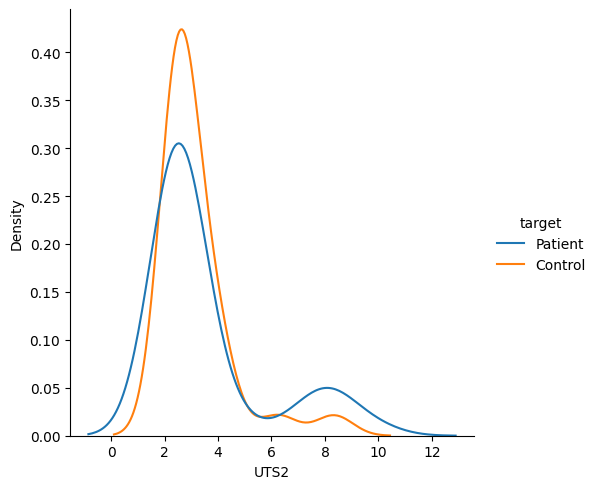

OLFM4
Test normality:  1.3048608707322273e-05 0.01057642325758934
Patient:  4.490592713953488
Control:  4.584237962962963
Test homogenius: LeveneResult(statistic=0.2998014906419131, pvalue=0.585799638400685)
MannwhitneyuResult(statistic=527.0, pvalue=0.52231601115928)


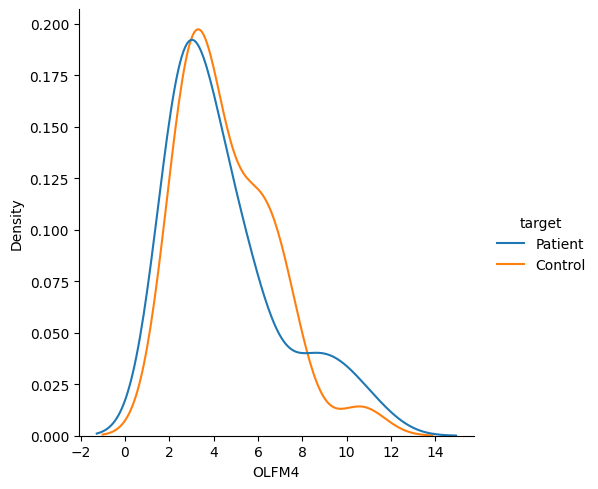

NEBL
Test normality:  2.82298007192594e-08 7.23737727525986e-08
Patient:  3.9695944953488365
Control:  2.986548718518518
Test homogenius: LeveneResult(statistic=3.4013717369374254, pvalue=0.06949861892849996)
MannwhitneyuResult(statistic=681.0, pvalue=0.1591556024527201)


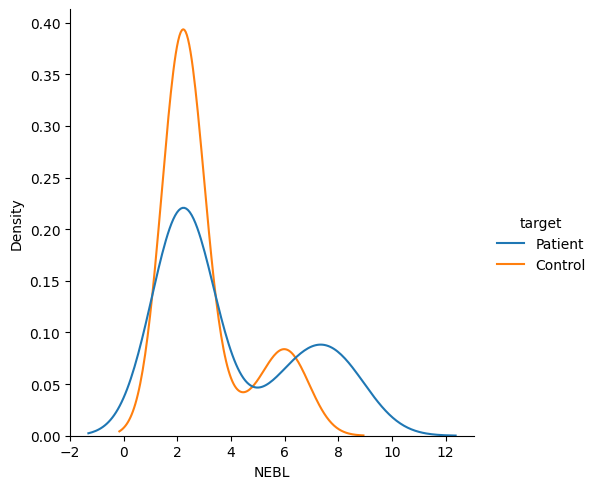

ALAS2
Test normality:  6.919271267058491e-10 2.4599375314515726e-10
Patient:  3.4761219813953486
Control:  2.436861622222222
Test homogenius: LeveneResult(statistic=4.2995939285359634, pvalue=0.041912117087313586)
Ttest_indResult(statistic=2.4956053302377272, pvalue=0.015553320969636637)


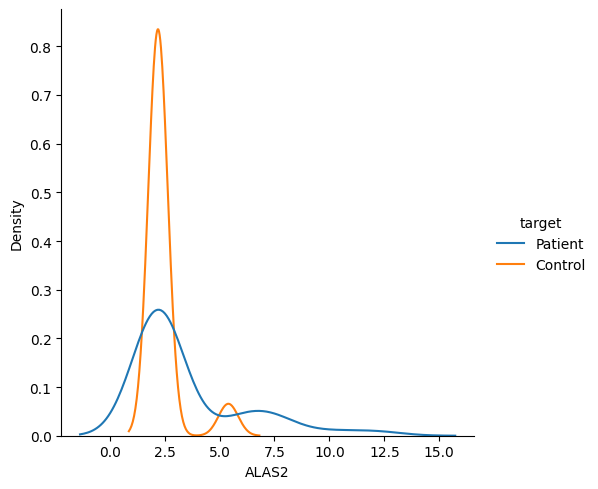

CRISP3
Test normality:  3.5334852555024554e-07 1.279497723771783e-06
Patient:  4.070661553488372
Control:  3.313196525925926
Test homogenius: LeveneResult(statistic=2.279186366362477, pvalue=0.13575353463731932)
MannwhitneyuResult(statistic=608.5, pvalue=0.737580623924653)


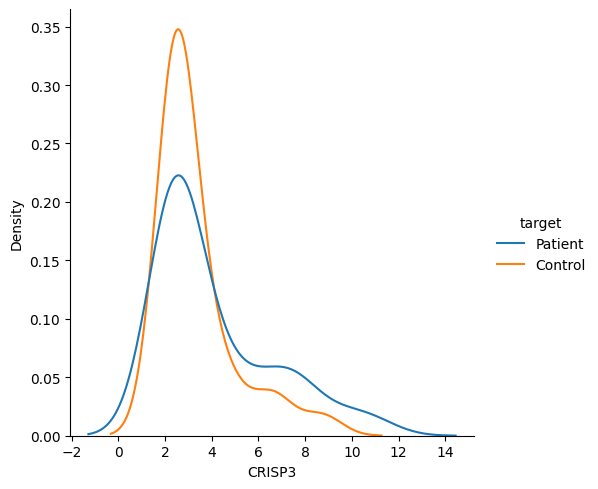

CXCL3
Test normality:  1.1738013339090969e-11 7.581856670269005e-11
Patient:  2.8483672627906973
Control:  2.2187938111111114
Test homogenius: LeveneResult(statistic=3.6327700343124603, pvalue=0.06088017375799458)
MannwhitneyuResult(statistic=762.0, pvalue=0.007980236397838219)


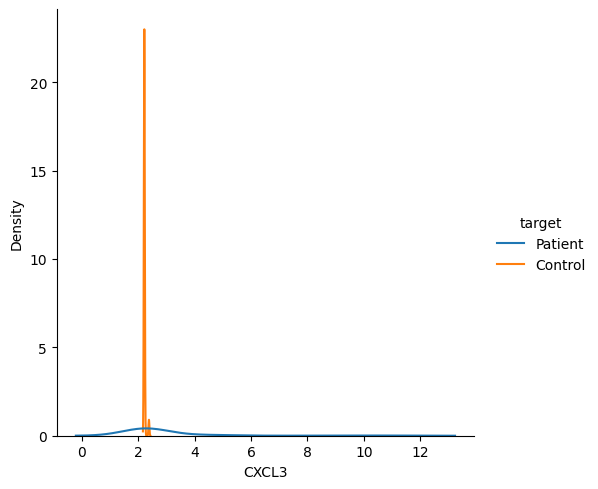

HLA-DQB1
Test normality:  1.3091703010559286e-07 4.010538305010414e-06
Patient:  8.00488653023256
Control:  7.682172485185185
Test homogenius: LeveneResult(statistic=0.04031027003038451, pvalue=0.841474466230977)
MannwhitneyuResult(statistic=619.5, pvalue=0.6409392476872671)


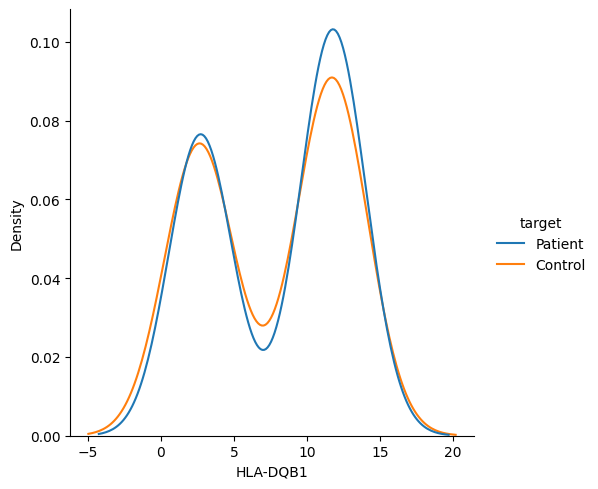

HLA-DRB1
Test normality:  1.2565293694422053e-08 2.174923793063499e-06
Patient:  4.827467232558139
Control:  4.943134477777778
Test homogenius: LeveneResult(statistic=0.016457993004798808, pvalue=0.898299162468871)
MannwhitneyuResult(statistic=558.0, pvalue=0.7845052939116229)


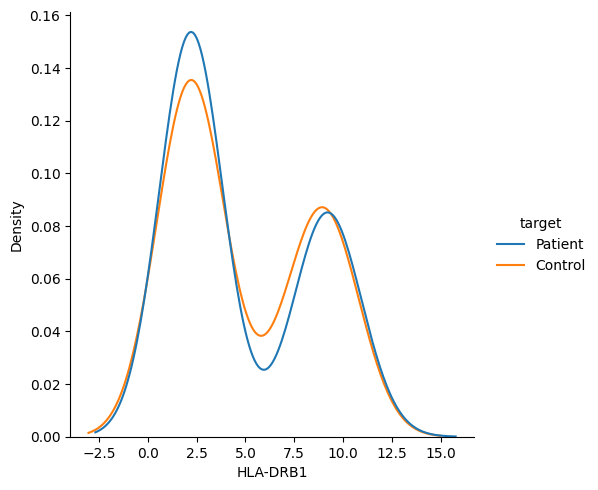

SELENBP1
Test normality:  6.579365524617131e-11 2.7202076702259603e-10
Patient:  3.040562804651162
Control:  2.3761842111111116
Test homogenius: LeveneResult(statistic=2.8122664289594517, pvalue=0.09813773529870687)
MannwhitneyuResult(statistic=668.5, pvalue=0.15118460938405195)


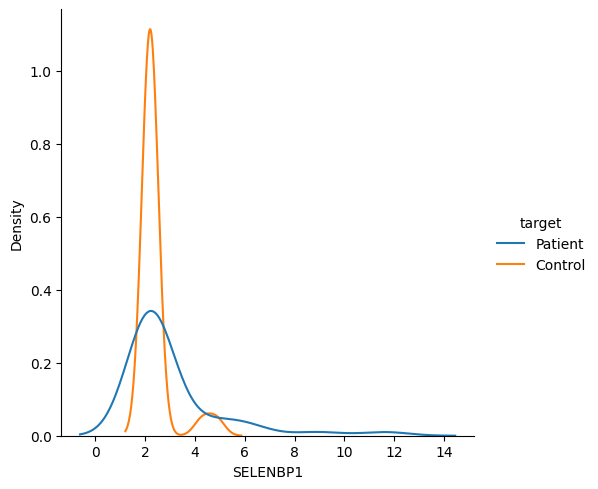

MMP8
Test normality:  6.875344737977684e-10 3.719296204351963e-09
Patient:  3.2004801534883724
Control:  2.6954500333333336
Test homogenius: LeveneResult(statistic=1.3808376022979916, pvalue=0.24405684008838927)
MannwhitneyuResult(statistic=640.0, pvalue=0.43374052691092224)


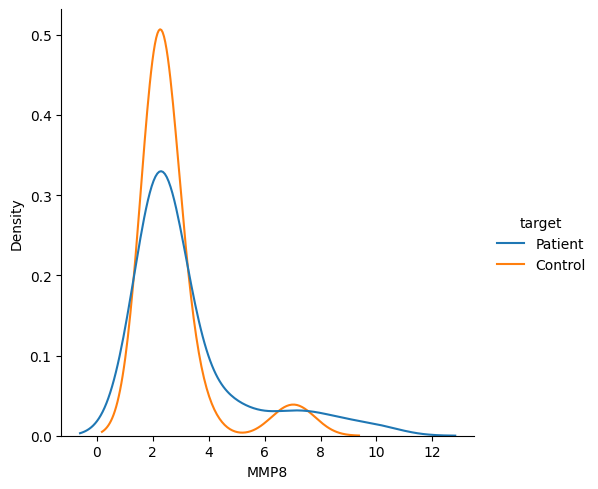

HLA-DQA1
Test normality:  9.381888332882227e-08 4.7940156946424395e-06
Patient:  7.615374962790697
Control:  7.366386562962964
Test homogenius: LeveneResult(statistic=0.030668448775147624, pvalue=0.8615025353976522)
MannwhitneyuResult(statistic=597.0, pvalue=0.8459385534366408)


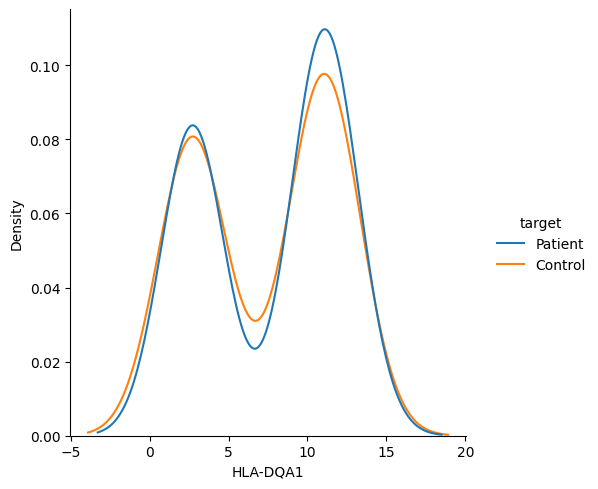

CEACAM6
Test normality:  1.165132768043975e-09 2.4500134259142214e-06
Patient:  3.1242083767441855
Control:  3.1543624074074073
Test homogenius: LeveneResult(statistic=0.005471176046700253, pvalue=0.9412534846908036)
MannwhitneyuResult(statistic=570.0, pvalue=0.9007682780976081)


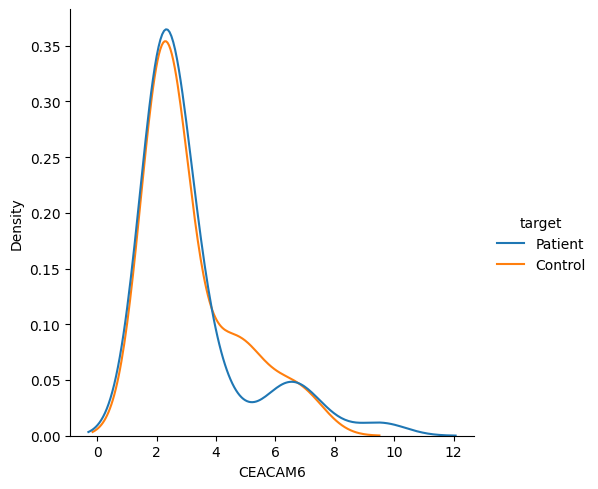

_______________________________________________
Time elapsed, s: 151
Start Schizo_filtered0.4_normalized, shape (72, 41)
model_name xgb, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
             

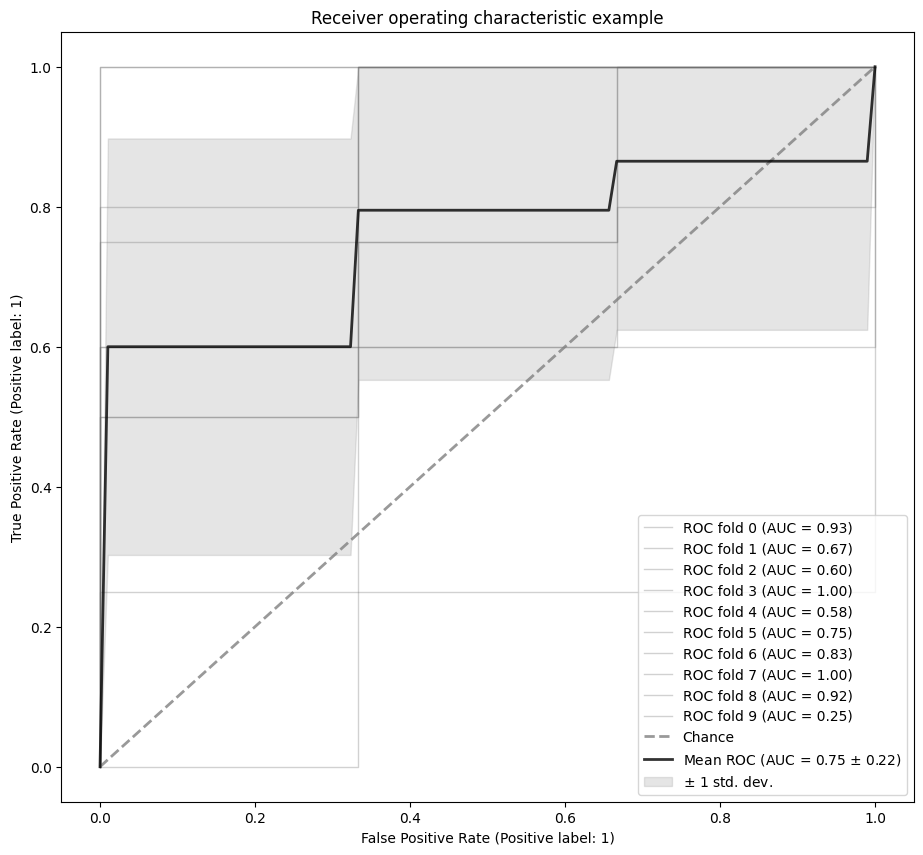

--------------------
______________stats___________________
PTGS2
Test normality:  1.23458517009567e-06 0.0003408843476790935
Patient:  4.01490143488372
Control:  2.7216119518518522
Test homogenius: LeveneResult(statistic=11.021635899500813, pvalue=0.0014503409113707667)
Ttest_indResult(statistic=3.7121616220676534, pvalue=0.0005524172331410339)


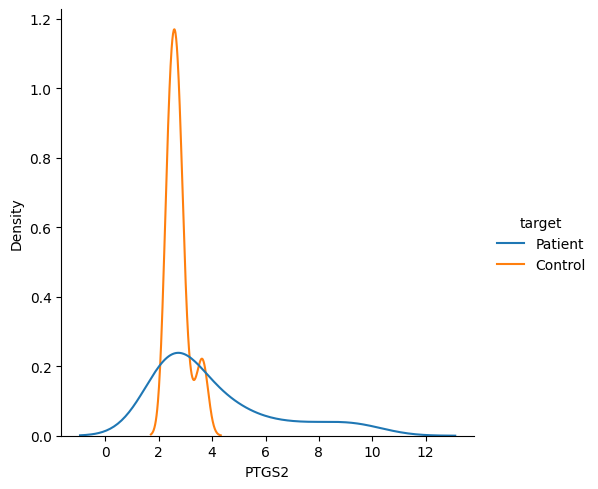

HLA-DQA1
Test normality:  3.433357154136729e-09 0.944724440574646
Patient:  10.901447197674418
Control:  11.23630411111111
MannwhitneyuResult(statistic=667.0, pvalue=0.2994240205857863)


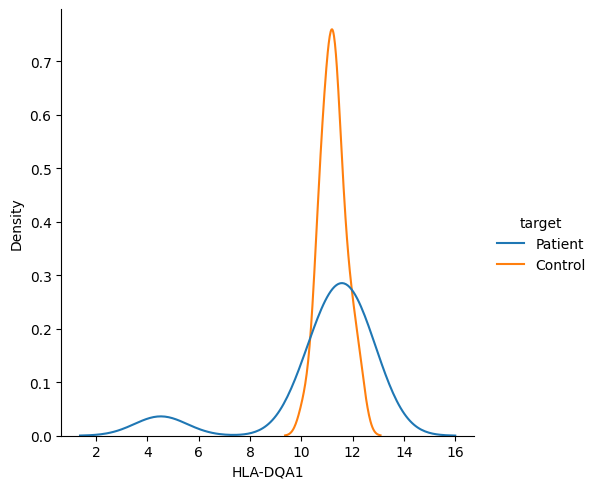

AHSP
Test normality:  4.773644257660692e-10 3.3755659378797986e-10
Patient:  3.0200753674418603
Control:  2.3372896555555553
Test homogenius: LeveneResult(statistic=4.31054427042546, pvalue=0.041659776172318023)
Ttest_indResult(statistic=2.531472874995258, pvalue=0.014418556572305221)


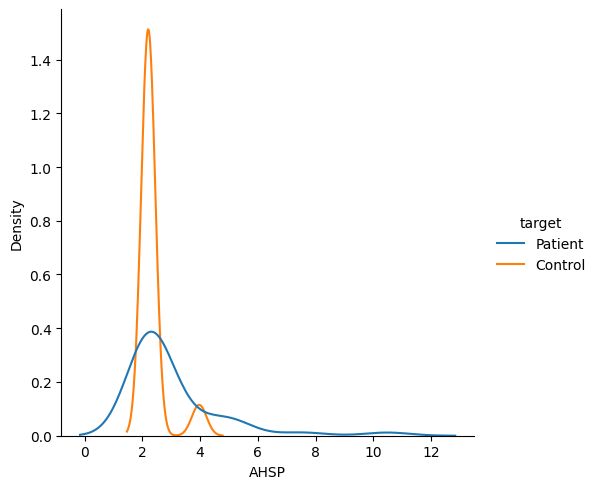

SOD2
Test normality:  4.01013480200163e-08 1.0153893725828311e-07
Patient:  3.2179999813953493
Control:  2.3961537
Test homogenius: LeveneResult(statistic=8.091438349079457, pvalue=0.005870506396523274)
Ttest_indResult(statistic=3.536390186821571, pvalue=0.0009077883365905941)


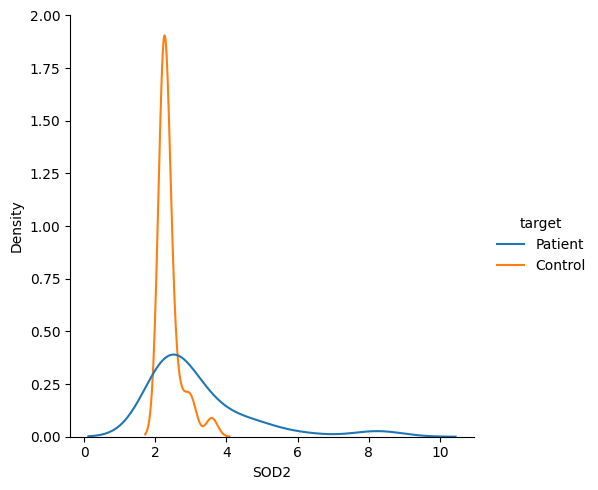

CXCL1
Test normality:  6.676675212702321e-08 3.0373205390787916e-06
Patient:  3.5456679395348836
Control:  2.7413593592592593
Test homogenius: LeveneResult(statistic=4.910359504667576, pvalue=0.030046389951293984)
Ttest_indResult(statistic=3.0314786396170907, pvalue=0.003701674324084818)


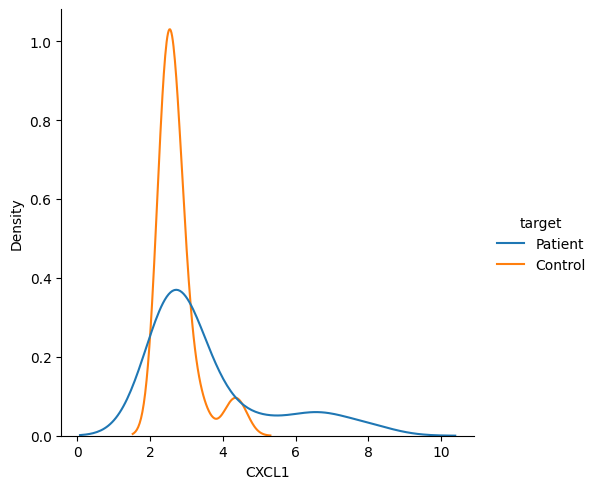

CFAP95
Test normality:  8.229985581920118e-08 4.206499149006504e-09
Patient:  3.3019145441860474
Control:  2.4711469444444445
Test homogenius: LeveneResult(statistic=6.218468404782158, pvalue=0.015080065040240861)
Ttest_indResult(statistic=2.921002735039607, pvalue=0.004855689660559124)


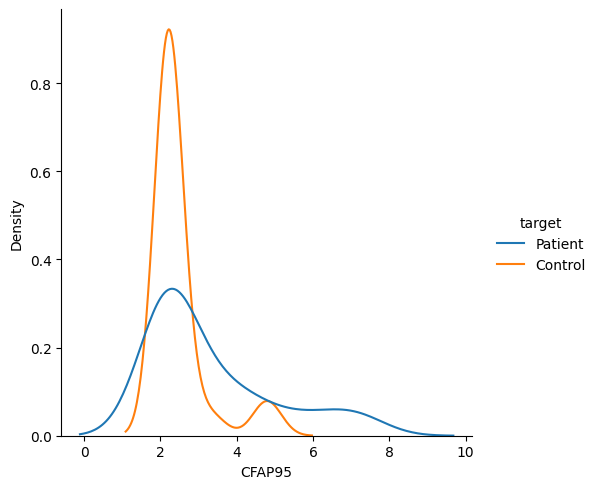

UTS2
Test normality:  1.6662858870475361e-09 4.3089136170237907e-07
Patient:  3.5239603418604655
Control:  3.1600613185185185
Test homogenius: LeveneResult(statistic=1.0710671287002977, pvalue=0.3043710689370497)
MannwhitneyuResult(statistic=504.5, pvalue=0.3607988943853996)


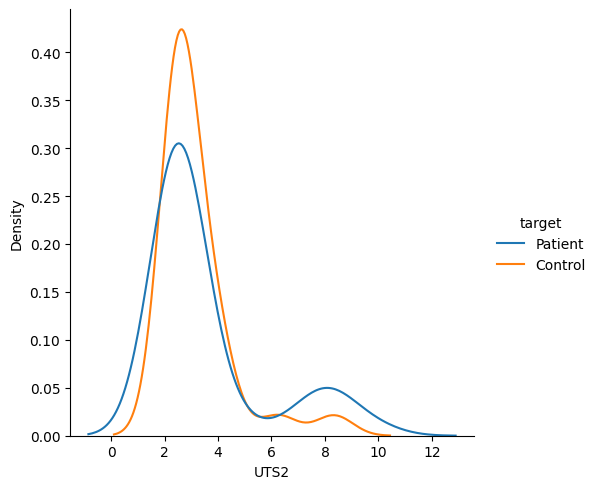

CA1
Test normality:  1.0608586009652754e-08 2.1707574404672414e-08
Patient:  4.1009146
Control:  3.118050740740741
Test homogenius: LeveneResult(statistic=5.746652196285885, pvalue=0.019273181102349303)
Ttest_indResult(statistic=2.738991781509729, pvalue=0.008465533778961748)


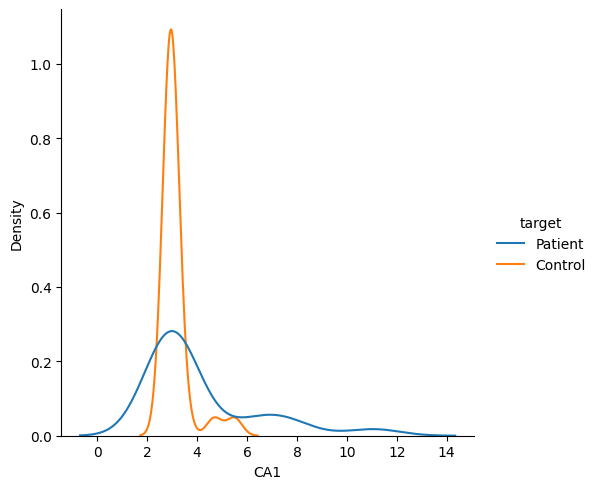

HLA-DRB4
Test normality:  7.424872364936164e-06 4.465911388251698e-06
Patient:  8.410689786046511
Control:  9.714905437037036
Test homogenius: LeveneResult(statistic=0.159597324293323, pvalue=0.690779542048189)
MannwhitneyuResult(statistic=518.0, pvalue=0.45434439026719886)


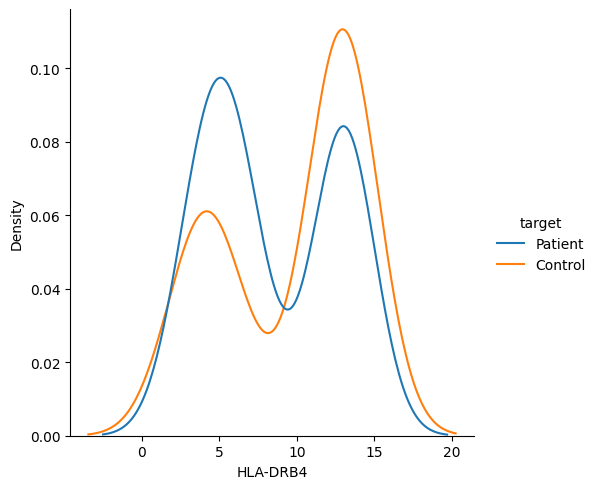

NEBL
Test normality:  2.82298007192594e-08 7.23737727525986e-08
Patient:  3.9695944953488365
Control:  2.986548718518518
Test homogenius: LeveneResult(statistic=3.4013717369374254, pvalue=0.06949861892849996)
MannwhitneyuResult(statistic=681.0, pvalue=0.1591556024527201)


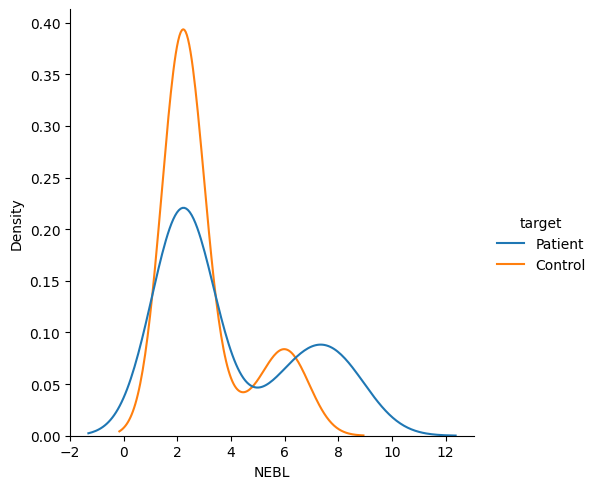

SCGB3A1
Test normality:  5.52491075112016e-09 1.975144868993084e-06
Patient:  4.1151730767441865
Control:  3.981250859259259
Test homogenius: LeveneResult(statistic=0.0813631226242468, pvalue=0.7763255897393863)
MannwhitneyuResult(statistic=606.5, pvalue=0.7568865845503265)


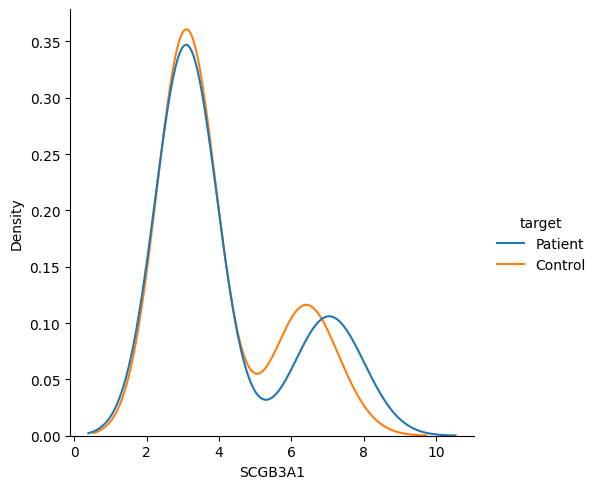

TACSTD2
Test normality:  1.0052070820165682e-06 2.0046384179295273e-06
Patient:  4.308453074418604
Control:  3.683986722222222
Test homogenius: LeveneResult(statistic=1.580110262710966, pvalue=0.21304536067341337)
MannwhitneyuResult(statistic=671.5, pvalue=0.2699874637357589)


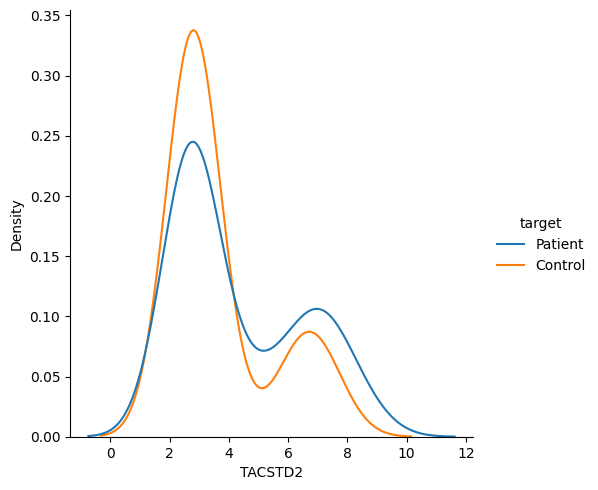

OLFM4
Test normality:  1.3048608707322273e-05 0.01057642325758934
Patient:  4.490592713953488
Control:  4.584237962962963
Test homogenius: LeveneResult(statistic=0.2998014906419131, pvalue=0.585799638400685)
MannwhitneyuResult(statistic=527.0, pvalue=0.52231601115928)


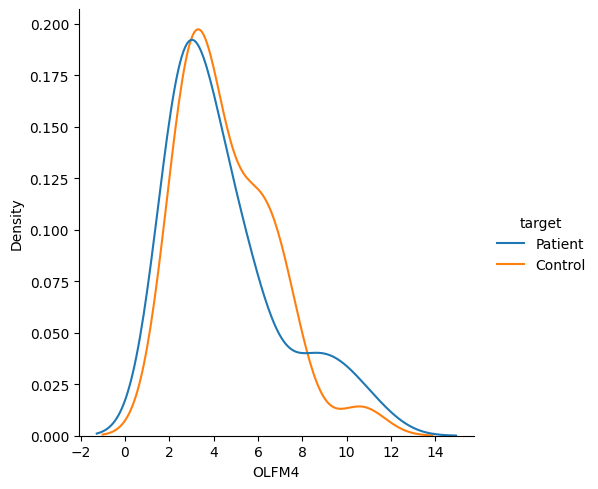

CRISP3
Test normality:  3.5334852555024554e-07 1.279497723771783e-06
Patient:  4.070661553488372
Control:  3.313196525925926
Test homogenius: LeveneResult(statistic=2.279186366362477, pvalue=0.13575353463731932)
MannwhitneyuResult(statistic=608.5, pvalue=0.737580623924653)


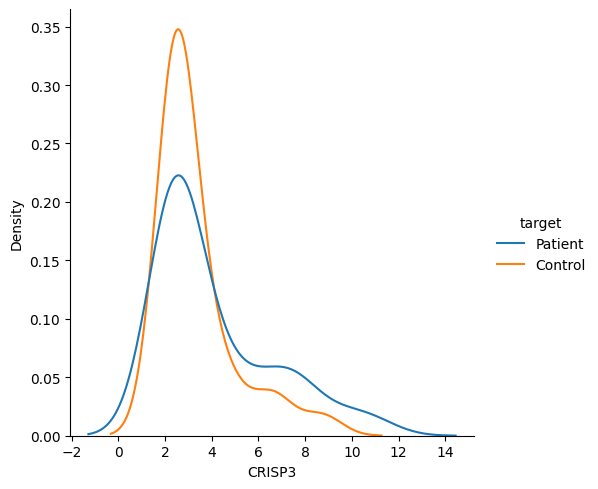

CXCL3
Test normality:  1.1738013339090969e-11 7.581856670269005e-11
Patient:  2.8483672627906973
Control:  2.2187938111111114
Test homogenius: LeveneResult(statistic=3.6327700343124603, pvalue=0.06088017375799458)
MannwhitneyuResult(statistic=762.0, pvalue=0.007980236397838219)


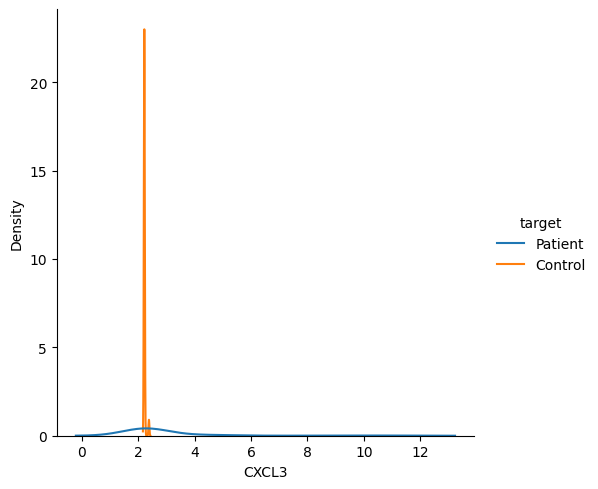

KRT1
Test normality:  1.4543316240178683e-07 2.127385556605077e-08
Patient:  3.2982457674418604
Control:  2.668282570370371
Test homogenius: LeveneResult(statistic=3.3373371441457267, pvalue=0.07211312479779367)
MannwhitneyuResult(statistic=652.0, pvalue=0.3905039662286397)


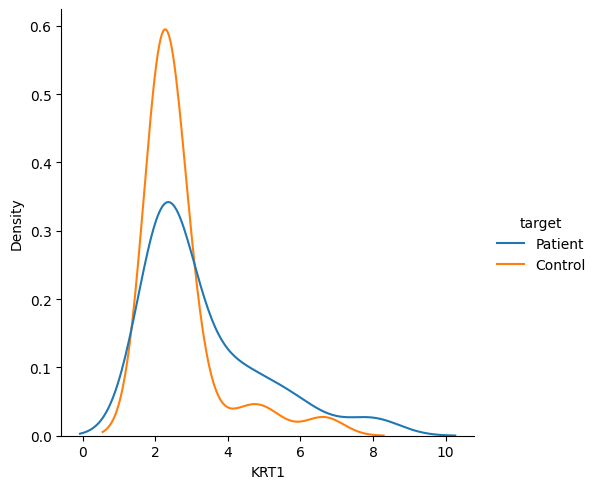

ZNF506
Test normality:  3.30723196384497e-07 3.231789236224358e-08
Patient:  3.5907008837209307
Control:  3.002144344444443
Test homogenius: LeveneResult(statistic=3.1032238832978334, pvalue=0.08263234595240304)
MannwhitneyuResult(statistic=715.5, pvalue=0.10413207855023543)


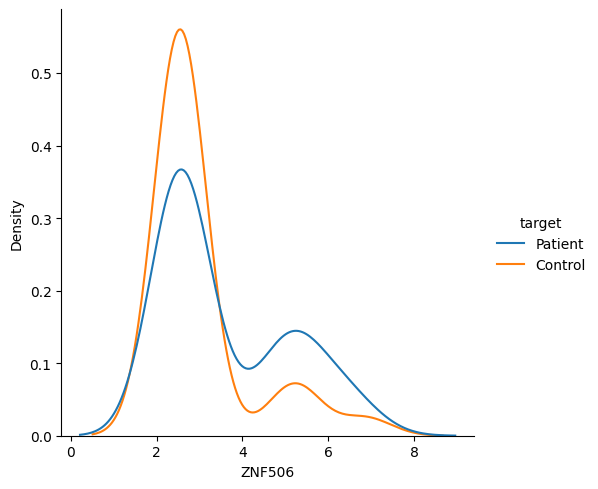

TMTC1
Test normality:  0.0005543400766327977 0.00012825573503505439
Patient:  4.21201176744186
Control:  3.9899400000000003
Test homogenius: LeveneResult(statistic=0.5502729268659382, pvalue=0.4607606780238849)
MannwhitneyuResult(statistic=628.5, pvalue=0.5642253702169987)


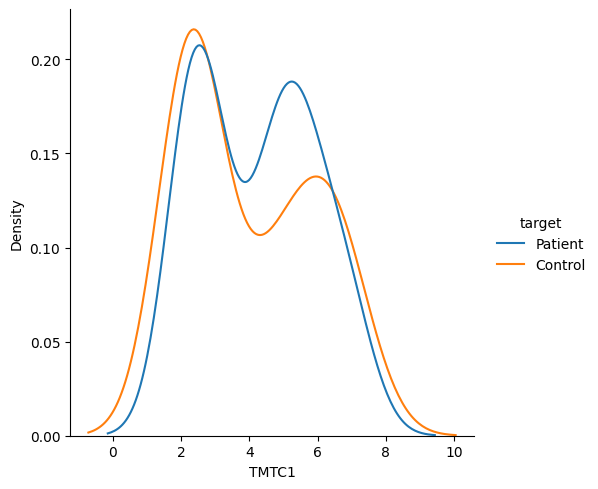

C17orf97
Test normality:  3.801097818723065e-06 0.00015784848073963076
Patient:  3.848643190697675
Control:  3.9252234370370362
Test homogenius: LeveneResult(statistic=0.10223747312530469, pvalue=0.7501412521156169)
MannwhitneyuResult(statistic=588.5, pvalue=0.9276845501674852)


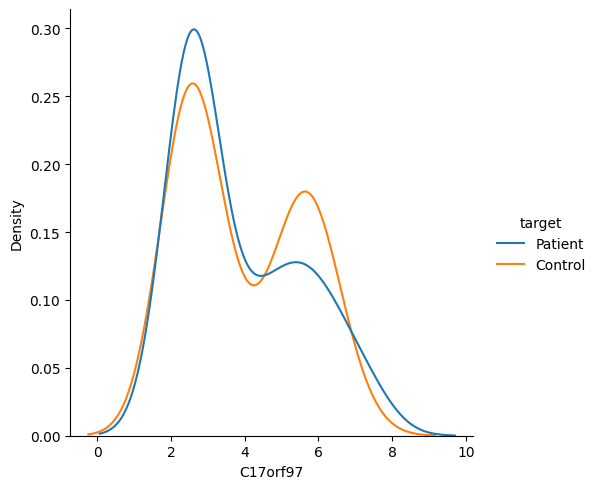

HLA-DRB1
Test normality:  1.2565293694422053e-08 2.174923793063499e-06
Patient:  4.827467232558139
Control:  4.943134477777778
Test homogenius: LeveneResult(statistic=0.016457993004798808, pvalue=0.898299162468871)
MannwhitneyuResult(statistic=558.0, pvalue=0.7845052939116229)


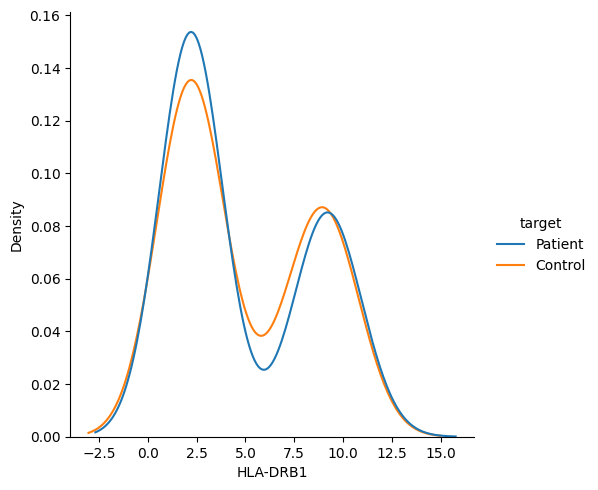

_______________________________________________
Time elapsed, s: 153
Start Schizo_filtered0.3_normalized, shape (72, 106)
model_name xgb, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
            

ROC AUC 10 folds: 0.7983333333333333 +- 0.19485749778862613 std
Accuracy 10 folds: 0.7696428571428572 +- 0.17024329828878698 std
F1 10 folds: 0.754098124098124 +- 0.19499817361516172 std
__________________________________________________________________________
model_name xgb, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=72)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None,...e,
         

ROC AUC 10 folds: 0.805 +- 0.10302372973683728 std
Accuracy 10 folds: 0.7267857142857143 +- 0.13970860710049035 std
F1 10 folds: 0.714126984126984 +- 0.14791415288549883 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectKBest(k=72)
Pipeline(steps=[('feature_selection', SelectKBest(k=72)),
                ('model', RandomForestClassifier())])
ROC AUC 10 folds: 0.7533333333333334 +- 0.17947454167962407 std
Accuracy 10 folds: 0.725 +- 0.14794510840862843 std
F1 10 folds: 0.7121572871572871 +- 0.15360803481954 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=57)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
         

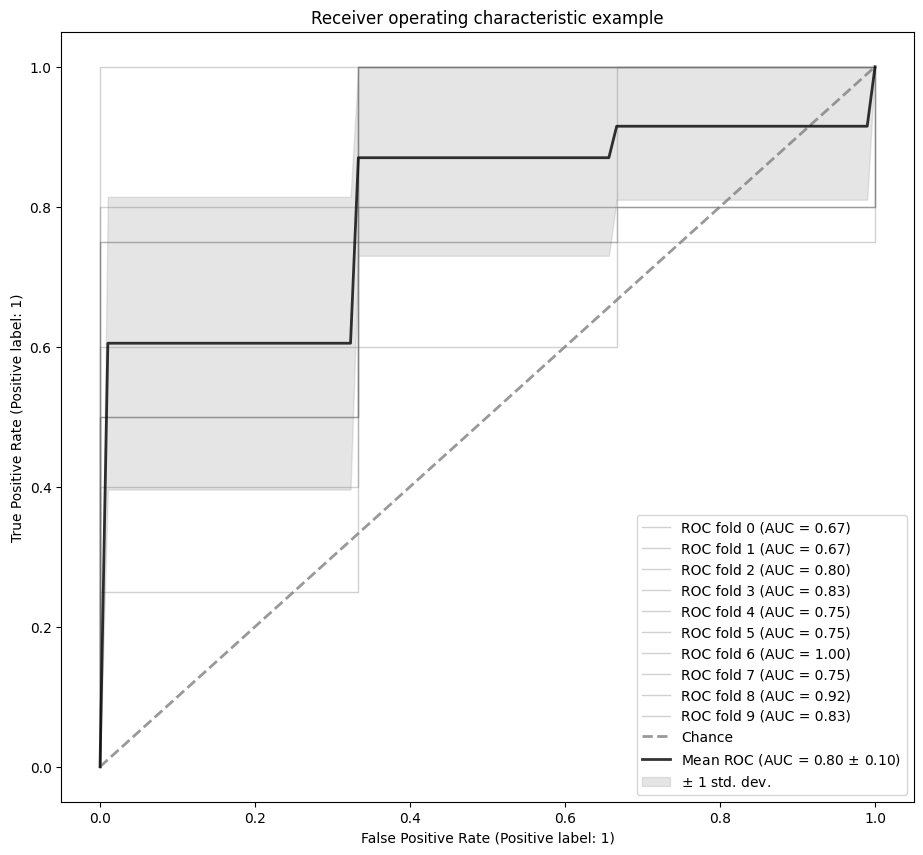

--------------------
______________stats___________________
PTGS2
Test normality:  1.23458517009567e-06 0.0003408843476790935
Patient:  4.01490143488372
Control:  2.7216119518518522
Test homogenius: LeveneResult(statistic=11.021635899500813, pvalue=0.0014503409113707667)
Ttest_indResult(statistic=3.7121616220676534, pvalue=0.0005524172331410339)


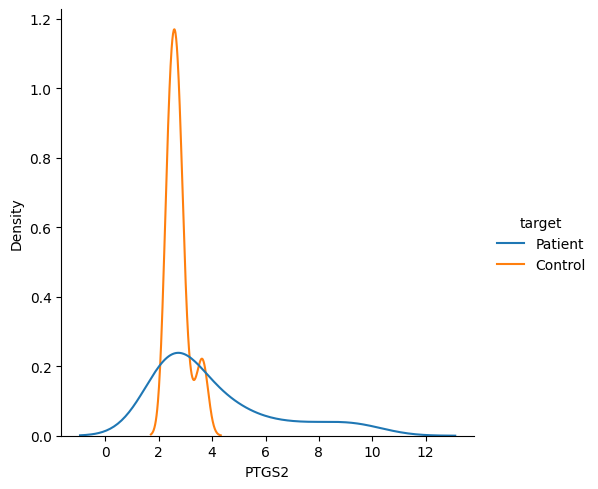

EGR3
Test normality:  3.791352128246217e-06 0.0010683570289984345
Patient:  4.309314302325581
Control:  3.283325996296296
Test homogenius: LeveneResult(statistic=11.396417817140168, pvalue=0.0012197993569298962)
Ttest_indResult(statistic=4.2463889726382575, pvalue=9.840174229317424e-05)


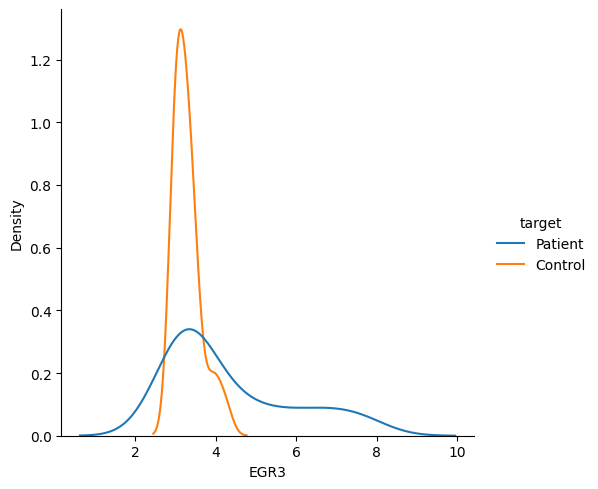

PSPH
Test normality:  5.34885566594312e-06 1.7297245449299226e-06
Patient:  7.555698769767442
Control:  5.834844907407408
Test homogenius: LeveneResult(statistic=4.29926870599698, pvalue=0.04191963665140165)
Ttest_indResult(statistic=2.865569252097562, pvalue=0.005619644943014291)


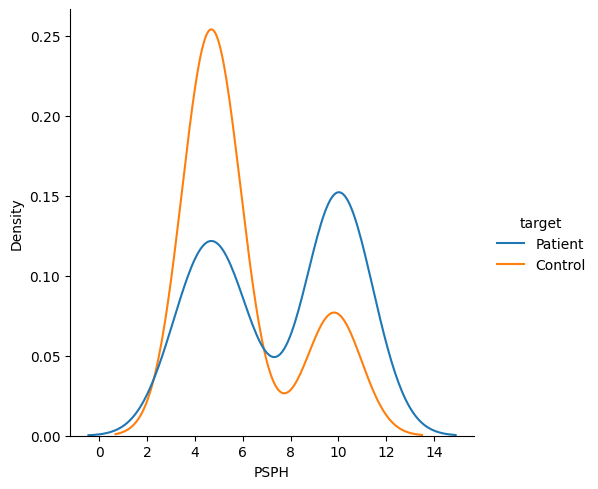

GNAL
Test normality:  4.290111732530022e-08 0.004044204019010067
Patient:  2.6154232255813956
Control:  3.490479496296296
Test homogenius: LeveneResult(statistic=20.86727293647074, pvalue=2.1305053440596275e-05)
Ttest_indResult(statistic=-3.453726420546467, pvalue=0.0015351573817831334)


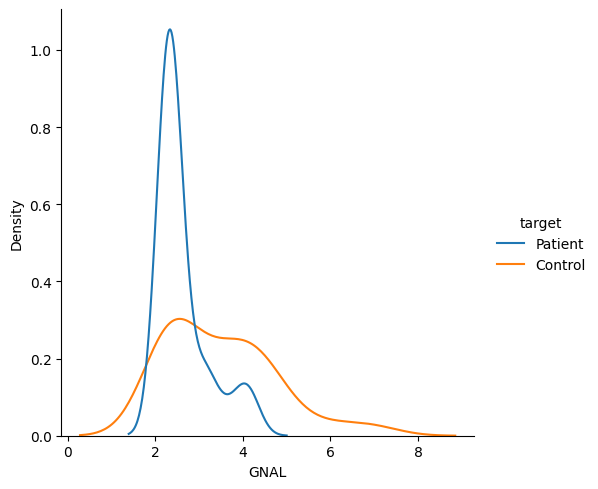

ADAMTS1
Test normality:  0.13204599916934967 0.5130916237831116
Patient:  3.849781976744186
Control:  4.8689576481481485
MannwhitneyuResult(statistic=337.5, pvalue=0.0034288601081867817)


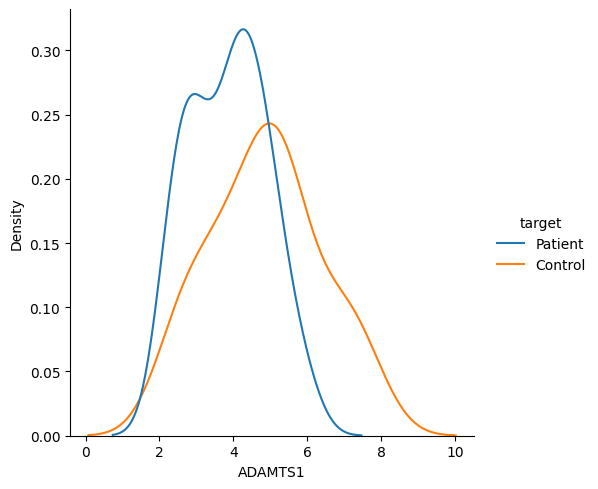

SOD2
Test normality:  4.01013480200163e-08 1.0153893725828311e-07
Patient:  3.2179999813953493
Control:  2.3961537
Test homogenius: LeveneResult(statistic=8.091438349079457, pvalue=0.005870506396523274)
Ttest_indResult(statistic=3.536390186821571, pvalue=0.0009077883365905941)


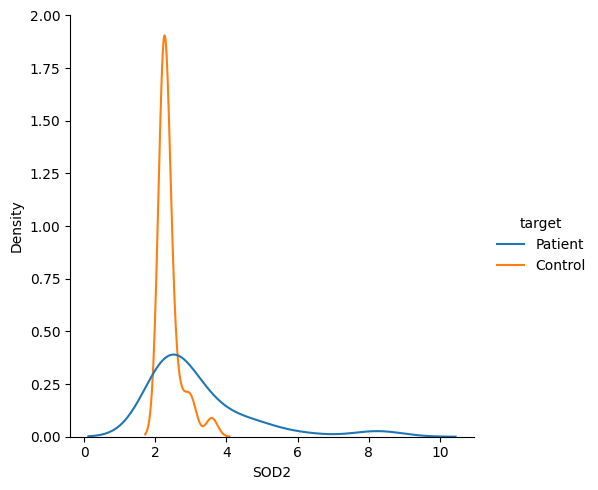

CXCL2
Test normality:  0.052007317543029785 0.0700131356716156
Patient:  6.672296299999998
Control:  4.965429588888889
MannwhitneyuResult(statistic=848.0, pvalue=0.001270755499233463)


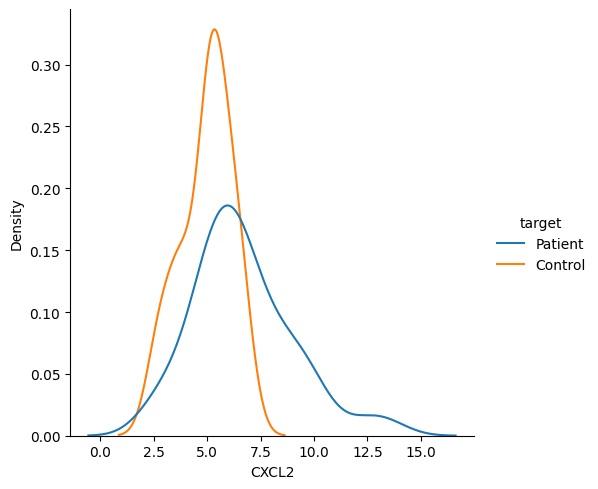

ORM1
Test normality:  2.717461811130306e-08 1.7169306829600828e-06
Patient:  3.1727637023255815
Control:  2.8545830296296293
Test homogenius: LeveneResult(statistic=2.4277571076094007, pvalue=0.12384563914927367)
MannwhitneyuResult(statistic=592.5, pvalue=0.8885410265672959)


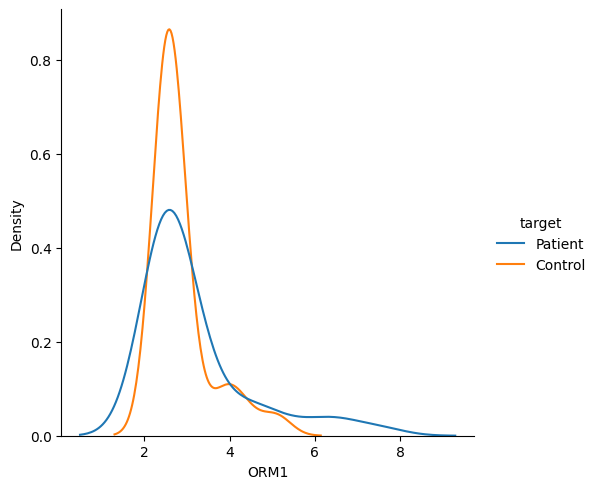

HLA-DQA1
Test normality:  3.433357154136729e-09 0.944724440574646
Patient:  10.901447197674418
Control:  11.23630411111111
MannwhitneyuResult(statistic=667.0, pvalue=0.2994240205857863)


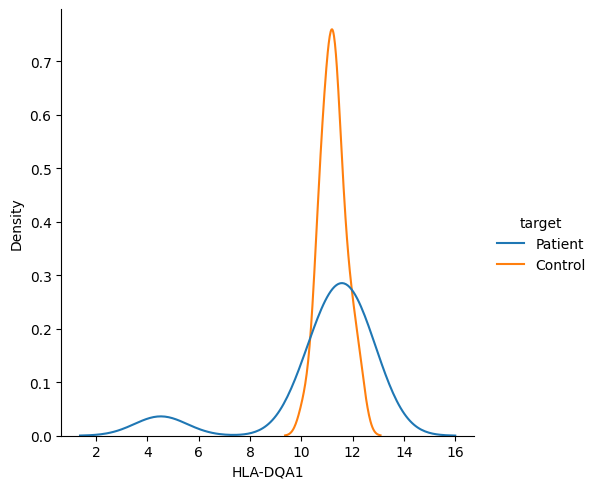

LINC01505
Test normality:  1.638299391981679e-11 3.3012081985361874e-05
Patient:  2.4544471930232556
Control:  3.072736340740741
Test homogenius: LeveneResult(statistic=10.899066728461303, pvalue=0.0015352184752394093)
Ttest_indResult(statistic=-2.8173042720620747, pvalue=0.0078093287917284804)


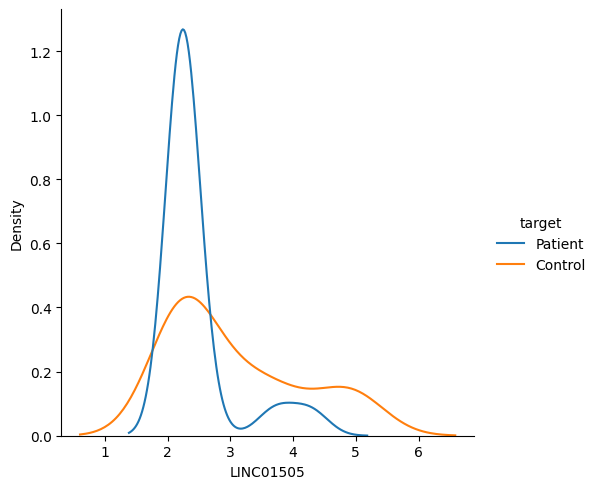

AHSP
Test normality:  4.773644257660692e-10 3.3755659378797986e-10
Patient:  3.0200753674418603
Control:  2.3372896555555553
Test homogenius: LeveneResult(statistic=4.31054427042546, pvalue=0.041659776172318023)
Ttest_indResult(statistic=2.531472874995258, pvalue=0.014418556572305221)


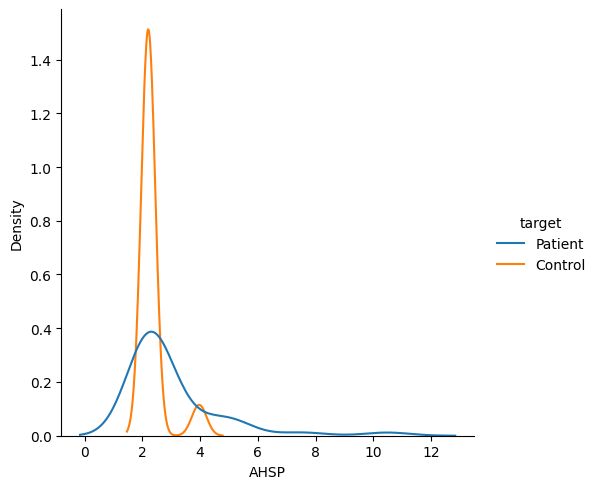

DSP
Test normality:  0.00037341468851082027 0.000349908514181152
Patient:  3.9619922162790697
Control:  3.5871083111111113
Test homogenius: LeveneResult(statistic=0.5489889828300011, pvalue=0.46128211866356894)
MannwhitneyuResult(statistic=655.0, pvalue=0.37083186475733065)


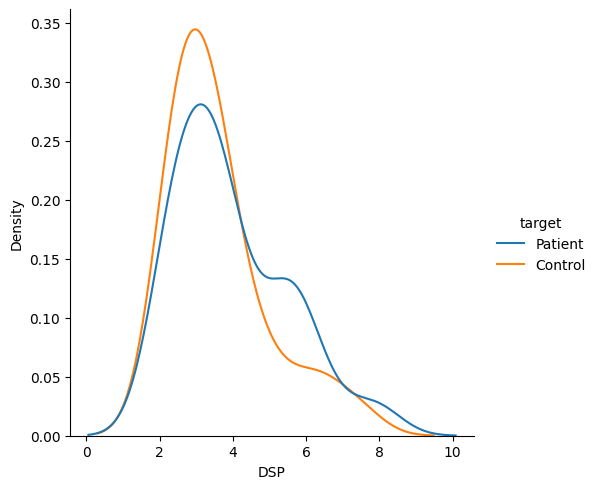

KRT1
Test normality:  1.4543316240178683e-07 2.127385556605077e-08
Patient:  3.2982457674418604
Control:  2.668282570370371
Test homogenius: LeveneResult(statistic=3.3373371441457267, pvalue=0.07211312479779367)
MannwhitneyuResult(statistic=652.0, pvalue=0.3905039662286397)


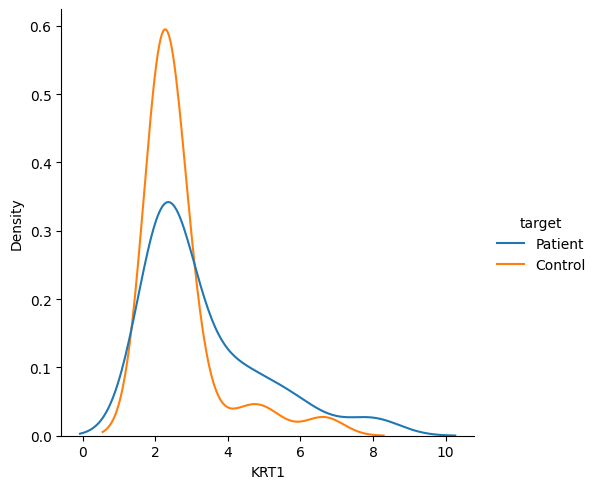

TACSTD2
Test normality:  1.0052070820165682e-06 2.0046384179295273e-06
Patient:  4.308453074418604
Control:  3.683986722222222
Test homogenius: LeveneResult(statistic=1.580110262710966, pvalue=0.21304536067341337)
MannwhitneyuResult(statistic=671.5, pvalue=0.2699874637357589)


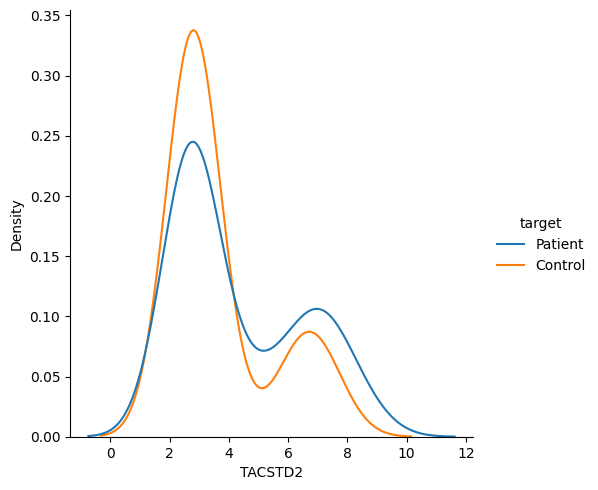

CRISP3
Test normality:  3.5334852555024554e-07 1.279497723771783e-06
Patient:  4.070661553488372
Control:  3.313196525925926
Test homogenius: LeveneResult(statistic=2.279186366362477, pvalue=0.13575353463731932)
MannwhitneyuResult(statistic=608.5, pvalue=0.737580623924653)


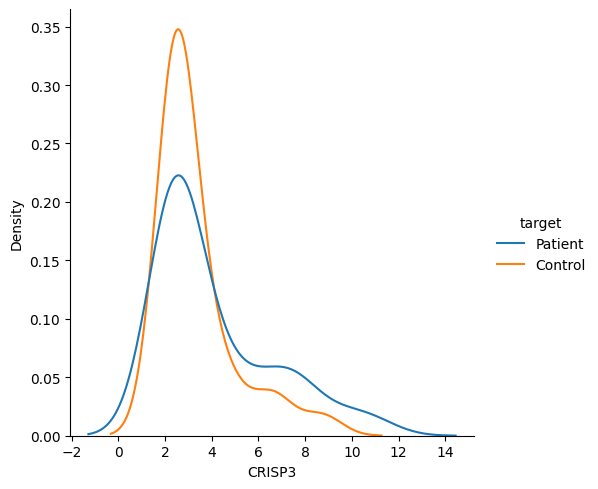

FAM157C
Test normality:  2.170345847485322e-10 1.1287075718513506e-09
Patient:  2.6223490093023254
Control:  2.460551496296296
Test homogenius: LeveneResult(statistic=0.6548604758210921, pvalue=0.4212028144590455)
MannwhitneyuResult(statistic=688.5, pvalue=0.17025436603442146)


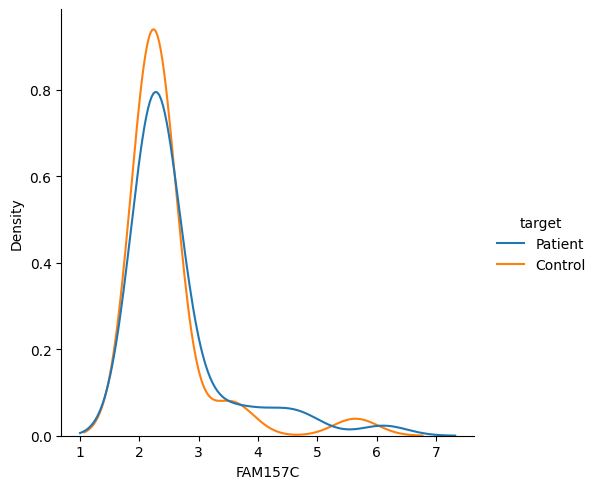

CEACAM1
Test normality:  5.898228433443009e-11 1.0932548200059955e-09
Patient:  2.6925375930232556
Control:  2.3320741111111114
Test homogenius: LeveneResult(statistic=2.3475838737908976, pvalue=0.13011681020610433)
MannwhitneyuResult(statistic=615.0, pvalue=0.627885657642114)


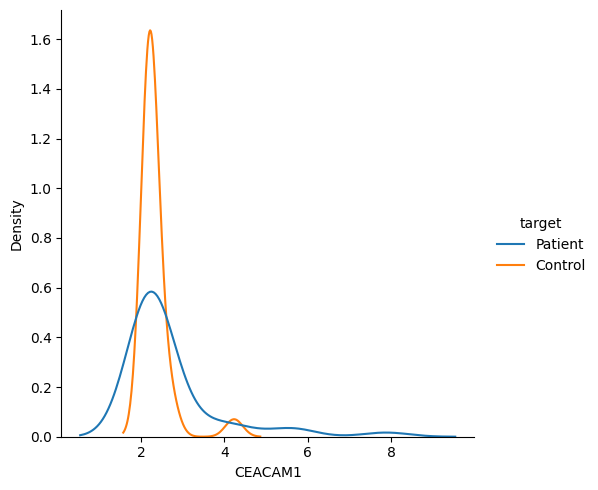

NRG1
Test normality:  0.0001456855534343049 0.00026052960311062634
Patient:  3.6567819372093027
Control:  2.9990866592592593
Test homogenius: LeveneResult(statistic=7.20952010676968, pvalue=0.009102561394489637)
Ttest_indResult(statistic=2.858083008966509, pvalue=0.005655825539851097)


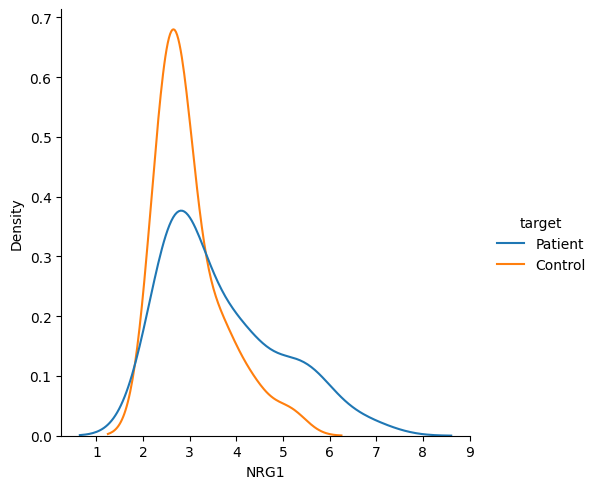

FAM118A
Test normality:  8.106521818262991e-07 0.0001574163616169244
Patient:  4.766932562790697
Control:  5.63033568888889
Test homogenius: LeveneResult(statistic=2.635648939020494, pvalue=0.10911653070102041)
MannwhitneyuResult(statistic=369.5, pvalue=0.010892028807454612)


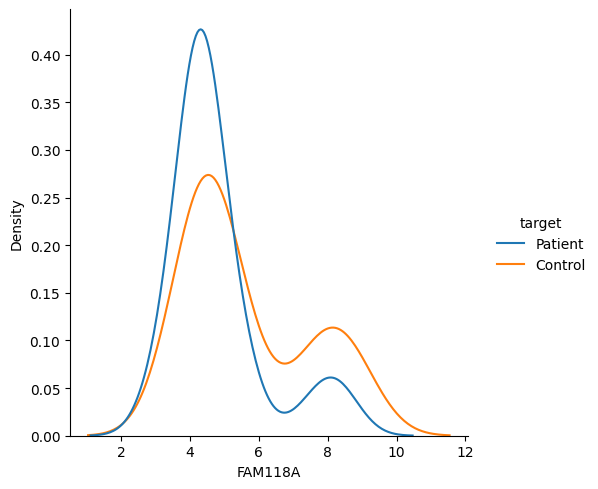

SLC4A1
Test normality:  6.944903674366287e-08 1.577399962116033e-05
Patient:  5.1654625139534875
Control:  4.437387348148148
Test homogenius: LeveneResult(statistic=3.844276688841401, pvalue=0.054013819416040505)
MannwhitneyuResult(statistic=660.0, pvalue=0.34029034277671955)


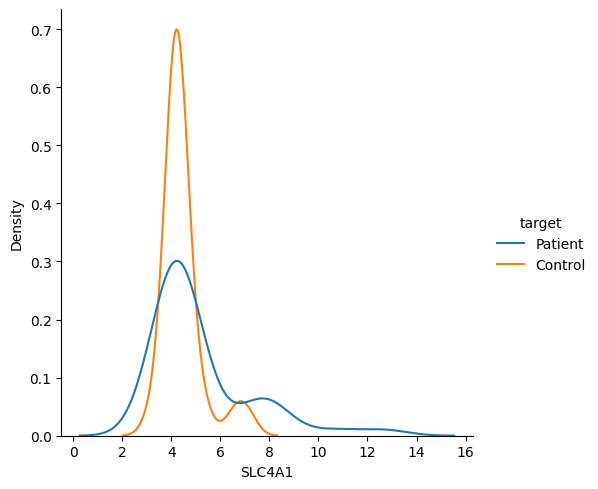

_______________________________________________
Time elapsed, s: 1673
Start Schizo_filtered0.2_normalized, shape (72, 387)
model_name xgb, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
           

ROC AUC 10 folds: 0.6950000000000001 +- 0.1869417615788998 std
Accuracy 10 folds: 0.6982142857142857 +- 0.17793637076442895 std
F1 10 folds: 0.675530303030303 +- 0.18855959149278012 std
__________________________________________________________________________
model_name xgb, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=72)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None,...e,
          

ROC AUC 10 folds: 0.8866666666666667 +- 0.12378296418418093 std
Accuracy 10 folds: 0.8232142857142858 +- 0.11640063205523045 std
F1 10 folds: 0.7870726495726496 +- 0.1709319242134683 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectKBest(k=72)
Pipeline(steps=[('feature_selection', SelectKBest(k=72)),
                ('model', RandomForestClassifier())])
ROC AUC 10 folds: 0.8666666666666668 +- 0.13102162671355697 std
Accuracy 10 folds: 0.8357142857142856 +- 0.1491472358415793 std
F1 10 folds: 0.8211111111111112 +- 0.1630070437014803 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=57)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifie

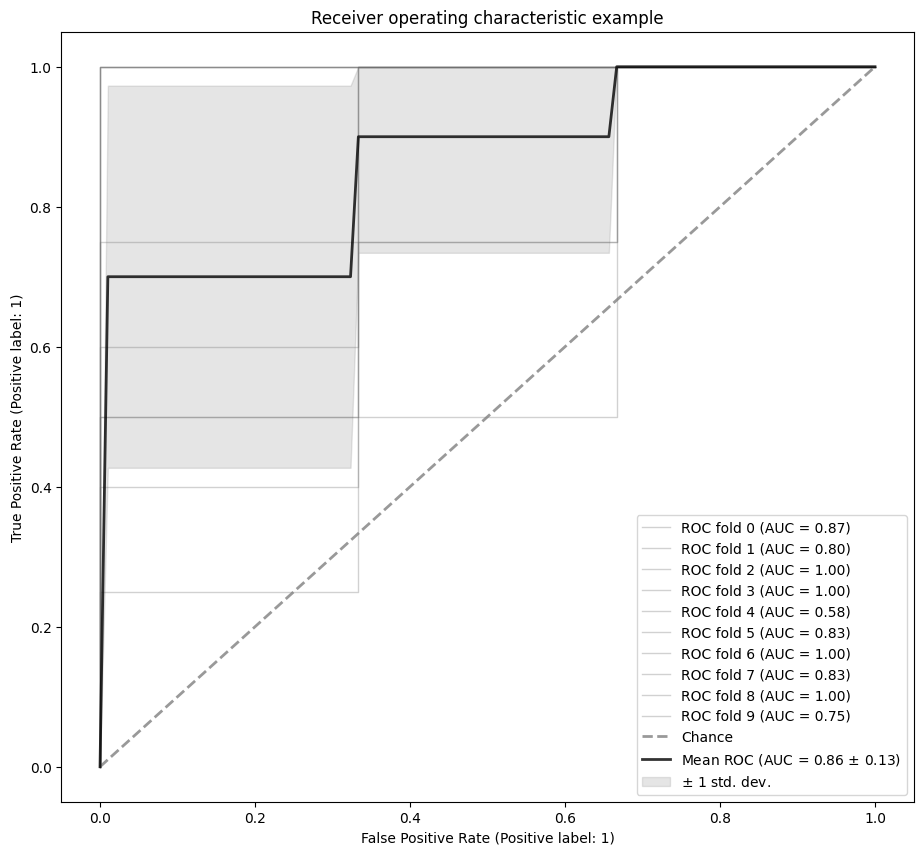

--------------------
______________stats___________________
EIF4G3
Test normality:  0.000609247712418437 2.4551741262257565e-06
Patient:  3.5272004209302326
Control:  2.8543792666666667
Test homogenius: LeveneResult(statistic=23.178537741024, pvalue=8.58625340206868e-06)
Ttest_indResult(statistic=4.105221318934481, pvalue=0.00011892793417118138)


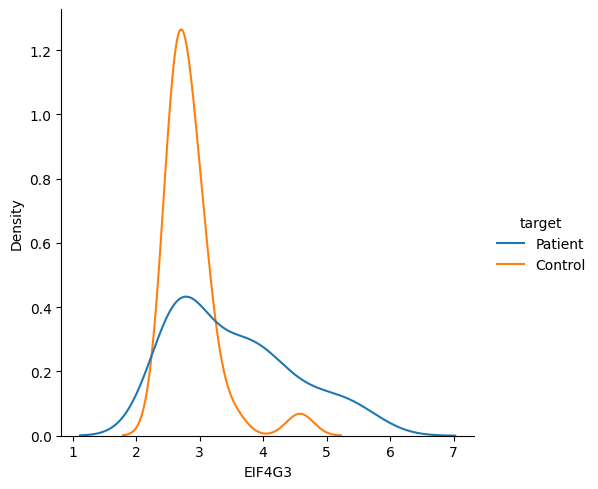

SOD2
Test normality:  4.01013480200163e-08 1.0153893725828311e-07
Patient:  3.2179999813953493
Control:  2.3961537
Test homogenius: LeveneResult(statistic=8.091438349079457, pvalue=0.005870506396523274)
Ttest_indResult(statistic=3.536390186821571, pvalue=0.0009077883365905941)


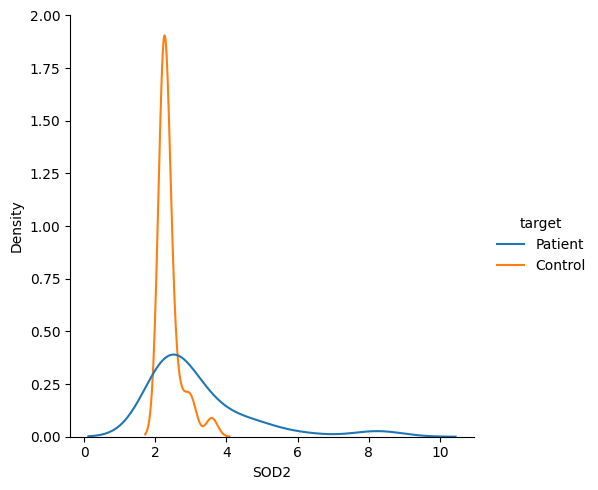

PSPH
Test normality:  5.34885566594312e-06 1.7297245449299226e-06
Patient:  7.555698769767442
Control:  5.834844907407408
Test homogenius: LeveneResult(statistic=4.29926870599698, pvalue=0.04191963665140165)
Ttest_indResult(statistic=2.865569252097562, pvalue=0.005619644943014291)


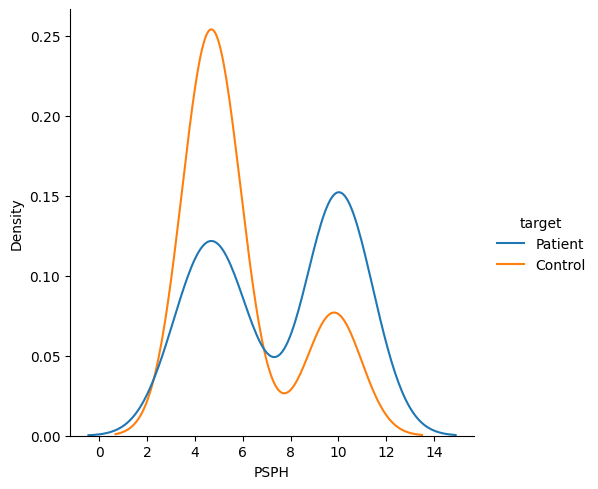

COL19A1
Test normality:  0.0018656111788004637 0.00012954181875102222
Patient:  3.167283106976744
Control:  2.6720684074074077
Test homogenius: LeveneResult(statistic=12.697203270203998, pvalue=0.0006748443141674942)
Ttest_indResult(statistic=3.872612888204429, pvalue=0.00024662108376989394)


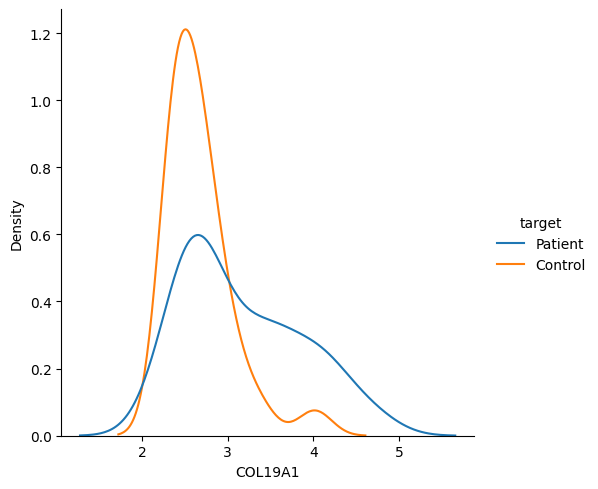

NR4A2
Test normality:  0.014398068189620972 0.3640642762184143
Patient:  6.64279888372093
Control:  6.0345665814814815
MannwhitneyuResult(statistic=673.5, pvalue=0.2643718964573404)


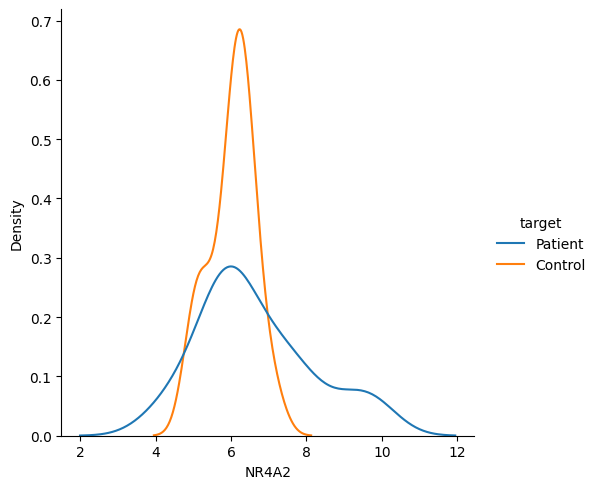

CXCL2
Test normality:  0.052007317543029785 0.0700131356716156
Patient:  6.672296299999998
Control:  4.965429588888889
MannwhitneyuResult(statistic=848.0, pvalue=0.001270755499233463)


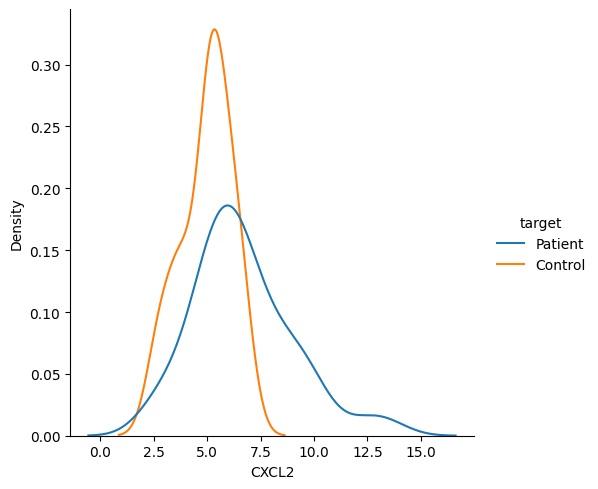

RHOBTB3
Test normality:  0.09950371086597443 0.22339630126953125
Patient:  3.834864641860465
Control:  4.819219522222222
MannwhitneyuResult(statistic=287.5, pvalue=0.00041464973639240946)


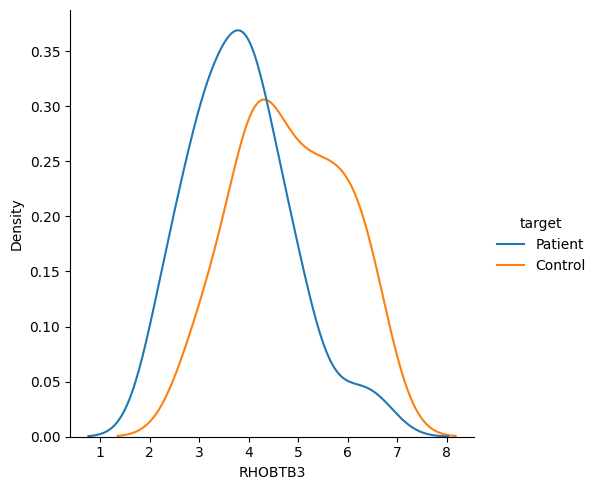

S1PR5
Test normality:  0.20173431932926178 0.50941401720047
Patient:  4.25695835116279
Control:  5.100115118518518
MannwhitneyuResult(statistic=275.0, pvalue=0.00022933283761238172)


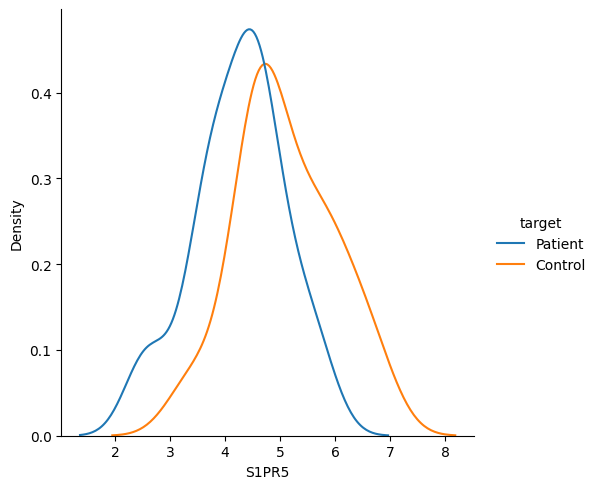

FAM118A
Test normality:  8.106521818262991e-07 0.0001574163616169244
Patient:  4.766932562790697
Control:  5.63033568888889
Test homogenius: LeveneResult(statistic=2.635648939020494, pvalue=0.10911653070102041)
MannwhitneyuResult(statistic=369.5, pvalue=0.010892028807454612)


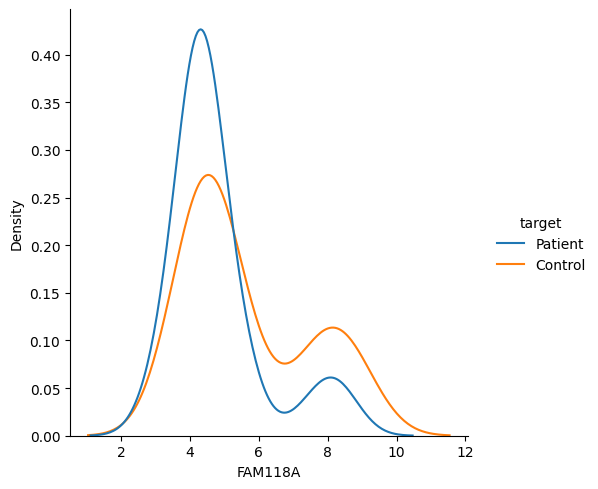

PTGDR
Test normality:  0.03471497818827629 0.1737246811389923
Patient:  5.470389923255814
Control:  6.309754662962965
MannwhitneyuResult(statistic=338.0, pvalue=0.003496248922005718)


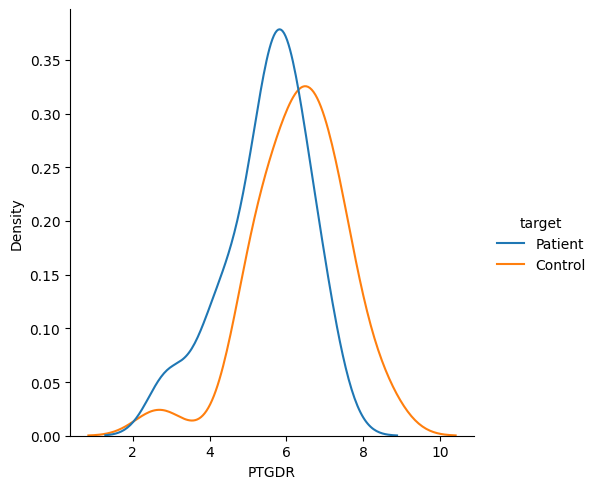

EGR3
Test normality:  3.791352128246217e-06 0.0010683570289984345
Patient:  4.309314302325581
Control:  3.283325996296296
Test homogenius: LeveneResult(statistic=11.396417817140168, pvalue=0.0012197993569298962)
Ttest_indResult(statistic=4.2463889726382575, pvalue=9.840174229317424e-05)


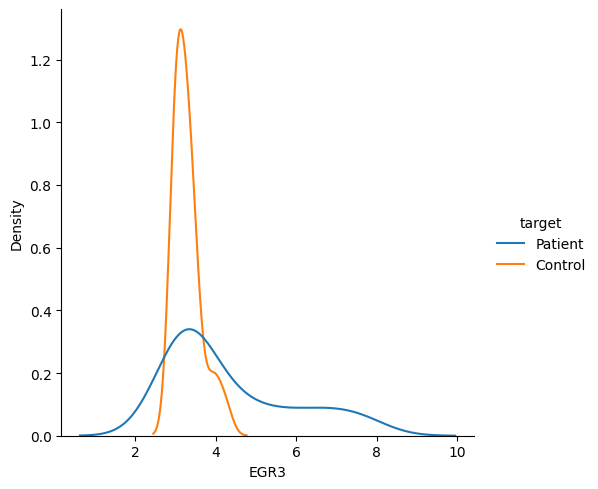

CXCL8
Test normality:  0.1876080483198166 0.03783424571156502
Patient:  9.392813023255814
Control:  7.856706485185185
MannwhitneyuResult(statistic=809.0, pvalue=0.005942559792716831)


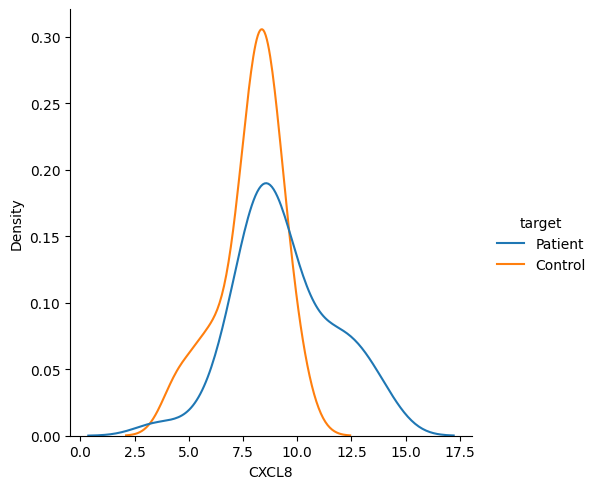

GNAL
Test normality:  4.290111732530022e-08 0.004044204019010067
Patient:  2.6154232255813956
Control:  3.490479496296296
Test homogenius: LeveneResult(statistic=20.86727293647074, pvalue=2.1305053440596275e-05)
Ttest_indResult(statistic=-3.453726420546467, pvalue=0.0015351573817831334)


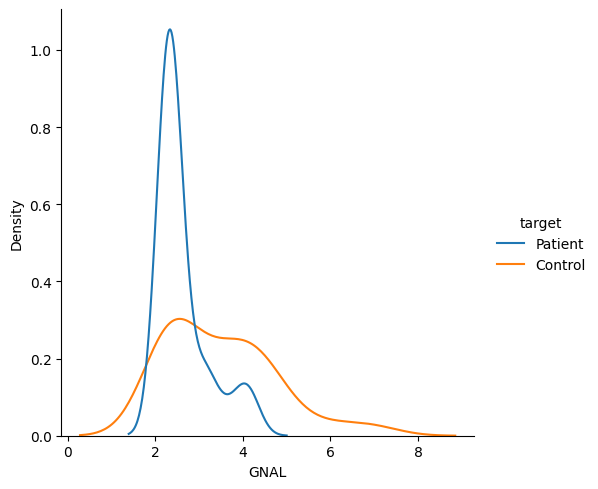

NLRP2
Test normality:  0.030810264870524406 0.009001064114272594
Patient:  4.048187674418605
Control:  4.968487251851853
Test homogenius: LeveneResult(statistic=0.6293715418595015, pvalue=0.4303454549173009)
MannwhitneyuResult(statistic=335.0, pvalue=0.003087689555211735)


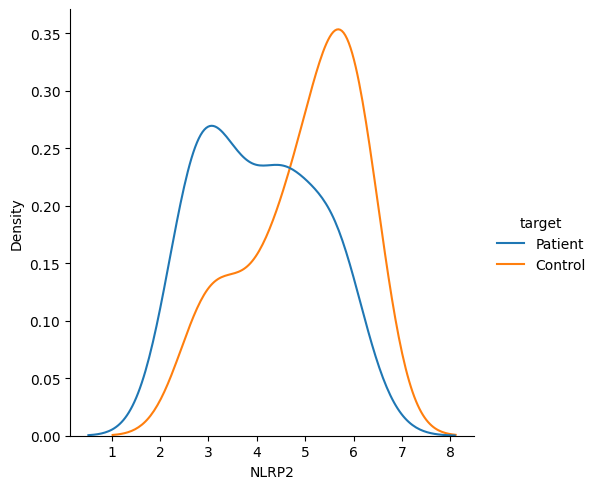

AHSP
Test normality:  4.773644257660692e-10 3.3755659378797986e-10
Patient:  3.0200753674418603
Control:  2.3372896555555553
Test homogenius: LeveneResult(statistic=4.31054427042546, pvalue=0.041659776172318023)
Ttest_indResult(statistic=2.531472874995258, pvalue=0.014418556572305221)


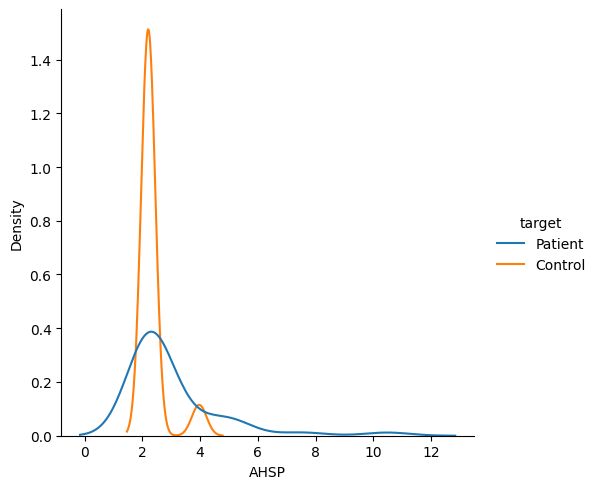

ETNK1
Test normality:  4.850520554100513e-07 6.792976137148798e-07
Patient:  2.886612186046512
Control:  2.5200963481481478
Test homogenius: LeveneResult(statistic=7.002389119946179, pvalue=0.010104334311210507)
Ttest_indResult(statistic=3.377858982611574, pvalue=0.0013235576802650148)


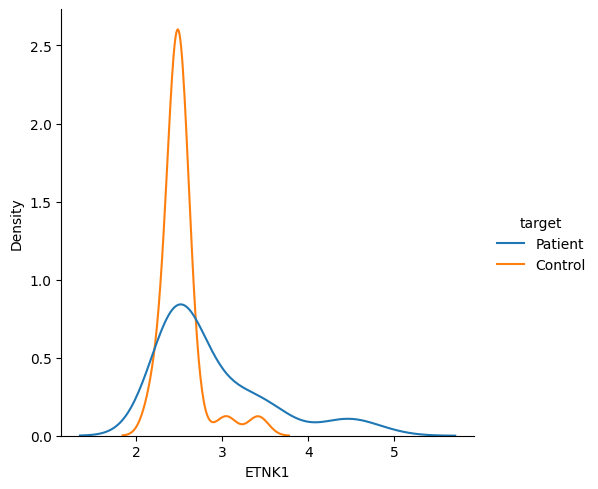

ENPP5
Test normality:  0.0016358911525458097 0.3146377205848694
Patient:  3.8522278720930228
Control:  4.464780644444444
MannwhitneyuResult(statistic=364.0, pvalue=0.008931947961275515)


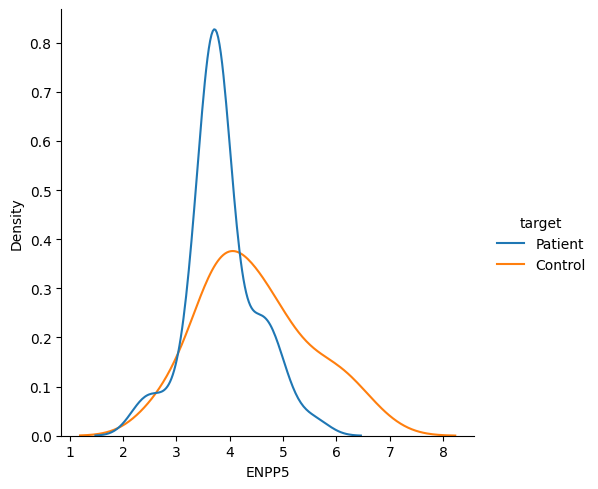

ANKRD36BP2
Test normality:  0.14716024696826935 0.050310660153627396
Patient:  4.310860972093024
Control:  3.7103065592592595
MannwhitneyuResult(statistic=787.5, pvalue=0.012661879527776374)


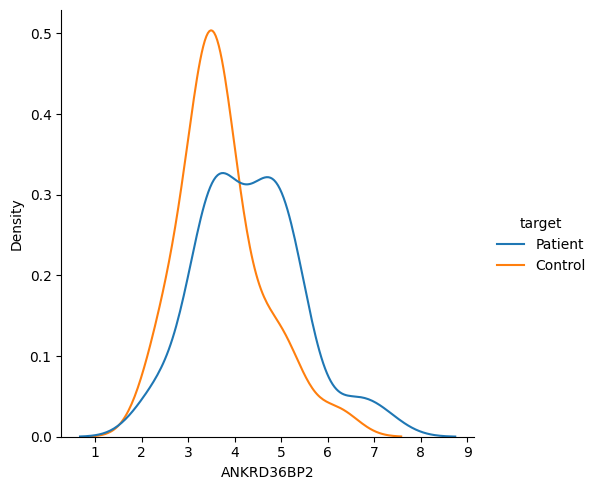

SLC8A1
Test normality:  0.00038760443567298353 3.5438556551525835e-06
Patient:  3.3903011883720926
Control:  2.994530422222222
Test homogenius: LeveneResult(statistic=1.7992040897739077, pvalue=0.18427158955158227)
MannwhitneyuResult(statistic=773.0, pvalue=0.020480444371664557)


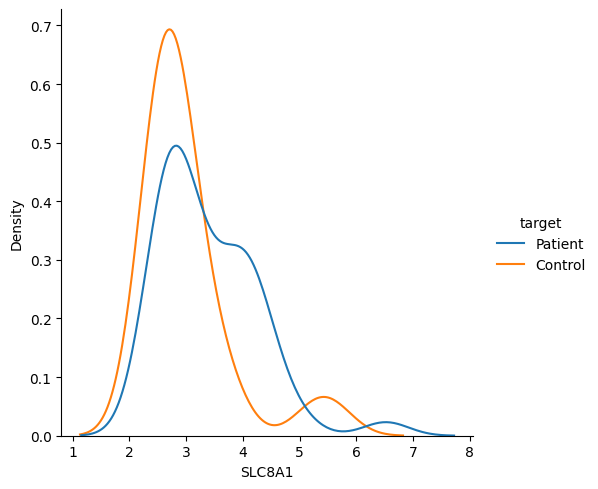

CSNK2A1
Test normality:  0.07690757513046265 0.44716042280197144
Patient:  3.490167874418604
Control:  4.055287329629629
MannwhitneyuResult(statistic=335.0, pvalue=0.0031126945682889784)


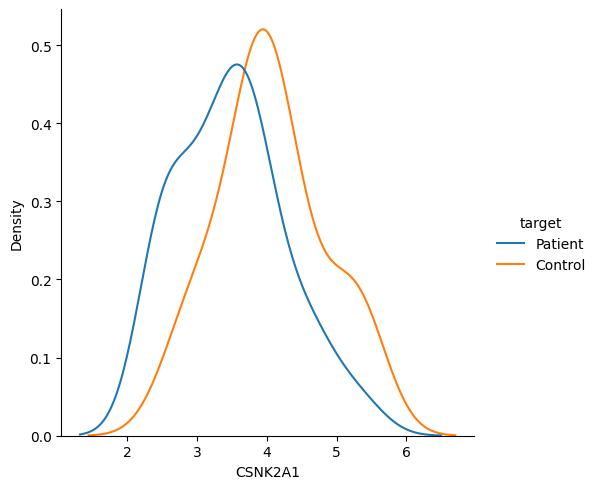

_______________________________________________
Time elapsed, s: 2549
Start Schizo_filtered0.1_normalized, shape (72, 2503)
model_name xgb, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
          

ROC AUC 10 folds: 0.7633333333333334 +- 0.18764623926716759 std
Accuracy 10 folds: 0.7535714285714286 +- 0.16633044317421453 std
F1 10 folds: 0.7359920634920634 +- 0.17658989208016082 std
__________________________________________________________________________
model_name xgb, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=72)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None,...e,
        

ROC AUC 10 folds: 0.7941666666666667 +- 0.160080275001152 std
Accuracy 10 folds: 0.7124999999999999 +- 0.1606051216556957 std
F1 10 folds: 0.6948556998556998 +- 0.16790513928496836 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectKBest(k=72)
Pipeline(steps=[('feature_selection', SelectKBest(k=72)),
                ('model', RandomForestClassifier())])
ROC AUC 10 folds: 0.8266666666666665 +- 0.17387735140993302 std
Accuracy 10 folds: 0.7374999999999999 +- 0.14420126595158872 std
F1 10 folds: 0.7196031746031746 +- 0.14571741965022153 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=57)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifie

AttributeError: 'PCA' object has no attribute 'get_support'

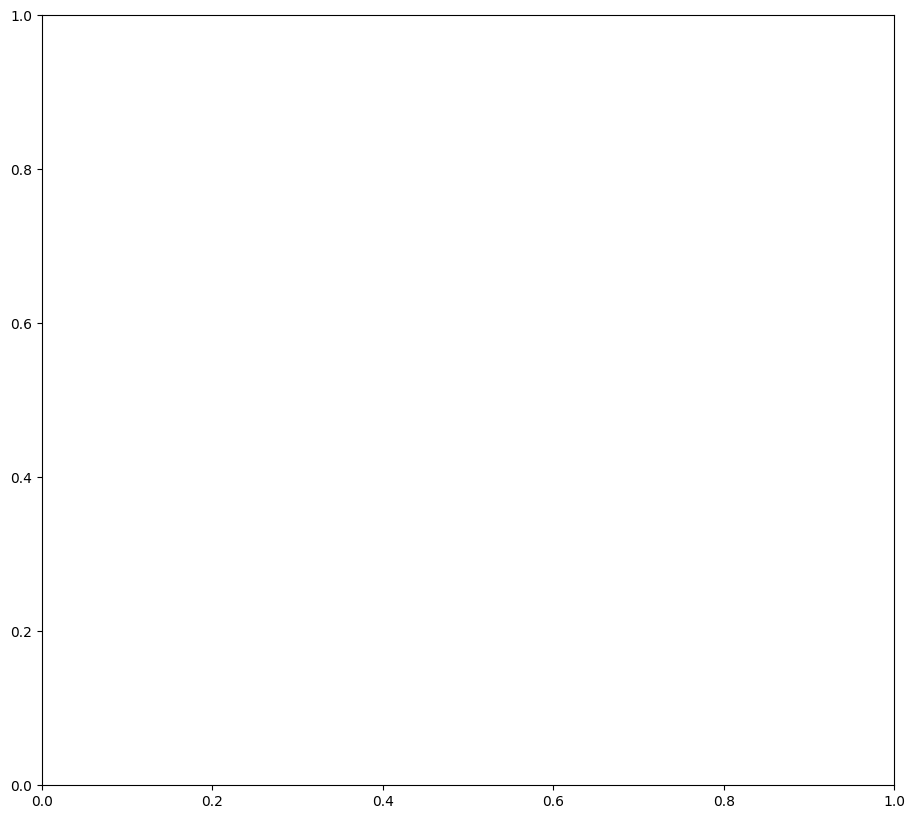

In [39]:
results_dict_metrics = {}
results_dict_f1 = {}

for fname in filtered:
    X,y,_ = processed[fname]
    print(f'Start {fname}, shape {X.shape}')
    

    start = datetime.now()
    
    best_result, best_f1 = experiments.run(X, y, experiment_name=fname, repeats=1, topN=1, scaling=False)
    results_dict_f1[fname] = best_f1
    results_dict_metrics[fname] = best_result
    
    end = datetime.now()
    print(f'Time elapsed, s: {(end-start).seconds}')

In [126]:
results_dict_f1

{'Schizo_filtered0.6_normalized': 0.5961688311688311,
 'Schizo_filtered0.5_normalized': 0.6678174603174604,
 'Schizo_filtered0.4_normalized': 0.7100396825396826,
 'Schizo_filtered0.3_normalized': 0.7675541125541125,
 'Schizo_filtered0.2_normalized': 0.8211111111111112}

----

model_name xgb, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
   

ROC AUC 10 folds: 0.6766666666666666 +- 0.26014952965127147 std
Accuracy 10 folds: 0.7303571428571429 +- 0.21553948688851252 std
F1 10 folds: 0.7117965367965369 +- 0.23974069357832922 std
model: model_name xgb, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=72), time elapsed: 0:03:56
__________________________________________________________________________
model_name xgb, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=57)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=57)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                            

ROC AUC 10 folds: 0.7016666666666667 +- 0.20755855934062453 std
Accuracy 10 folds: 0.6714285714285714 +- 0.1507210560429228 std
F1 10 folds: 0.6618398268398267 +- 0.15368394942813612 std
model: model_name svm, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=72), time elapsed: 0:00:27
__________________________________________________________________________
model_name svm, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=57)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=57)),
                ('model', SVC())])
ROC AUC 10 folds: 0.72 +- 0.20273134932713294 std
Accuracy 10 folds: 0.6946428571428571 +- 0.17649687804373107 std
F1 10 folds: 0.6648809523809524 +- 0.20248124265748155 std
mo

ROC AUC 10 folds: 0.8150000000000001 +- 0.20742468512691536 std
Accuracy 10 folds: 0.7267857142857143 +- 0.17277189456338207 std
F1 10 folds: 0.7233333333333333 +- 0.17397685284622968 std
model: model_name lr, feature_selection_method SelectKBest(k='all'), time elapsed: 0:00:38
__________________________________________________________________________
model_name lr, feature_selection_method SelectKBest(k=57)
Pipeline(steps=[('feature_selection', SelectKBest(k=57)),
                ('model', LogisticRegression())])
ROC AUC 10 folds: 0.7983333333333333 +- 0.13238202294873727 std
Accuracy 10 folds: 0.6982142857142857 +- 0.10608104814485102 std
F1 10 folds: 0.6679906204906204 +- 0.1435157976712906 std
model: model_name lr, feature_selection_method SelectKBest(k=57), time elapsed: 0:00:12
__________________________________________________________________________
model_name lr, feature_selection_method SelectKBest(k=72)
Pipeline(steps=[('feature_selection', SelectKBest(k=72)),
              

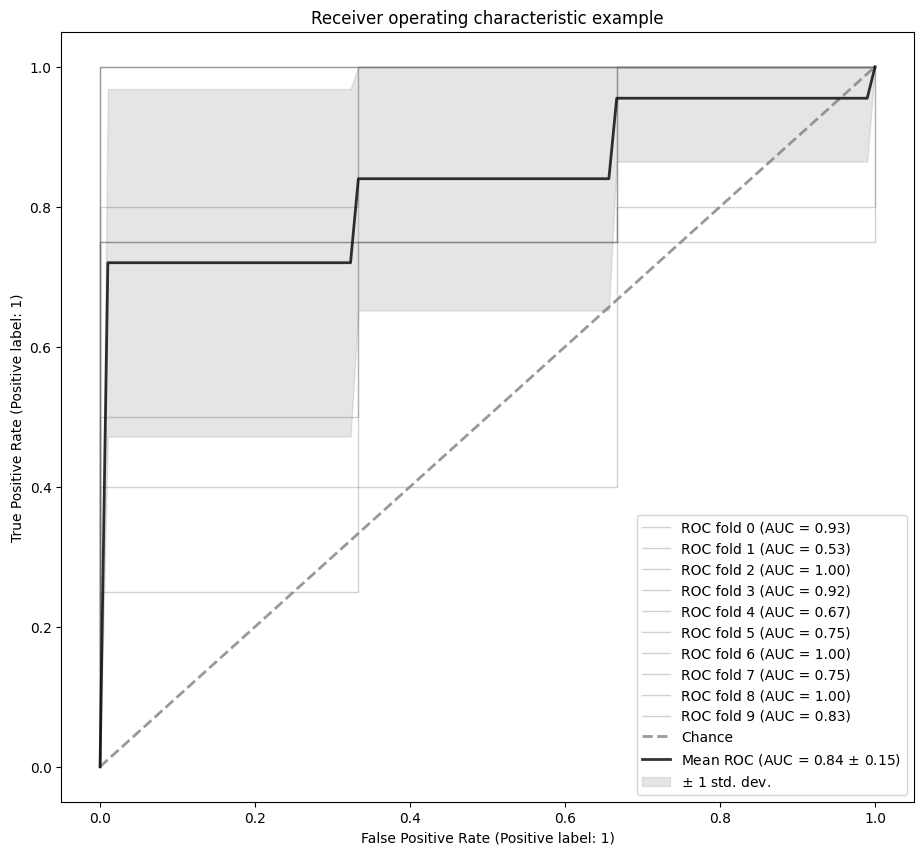

--------------------
Dimension reduction was applied, no original features were selected, hence no stats on those features


In [168]:
name = 'Schizo_filtered0.1_normalized'
best_result, best_f1 = autoNeuro.experiments.run(
    processed[name][0],
    processed[name][1],
    experiment_name=name,
    repeats=1,
    topN=1,
    scaling=False,
    plot_density=False,
)

In [169]:
results_dict_f1[name] = best_f1
results_dict_metrics[name] = best_result

In [173]:
results_dict_f1

{'Schizo_filtered0.6_normalized': 0.5961688311688311,
 'Schizo_filtered0.5_normalized': 0.6678174603174604,
 'Schizo_filtered0.4_normalized': 0.7100396825396826,
 'Schizo_filtered0.3_normalized': 0.7675541125541125,
 'Schizo_filtered0.2_normalized': 0.8211111111111112,
 'Schizo_filtered0.1_normalized': 0.7945634920634921}

In [186]:
sorted(processed.keys())

['Schizo_filtered0.01_normalized',
 'Schizo_filtered0.02_normalized',
 'Schizo_filtered0.05_normalized',
 'Schizo_filtered0.1_normalized',
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.6_normalized',
 'Schizo_unfiltered_normalized',
 'Schizo_unfiltered_raw']

In [187]:
all_total_metrics = {}

In [188]:
name = 'Schizo_unfiltered_normalized'
best_result, best_f1, total_metrics = autoNeuro.experiments.run(
    processed[name][0],
    processed[name][1],
    experiment_name=name,
    repeats=1,
    topN=1,
    scaling=False,
    plot_density=False,
)

results_dict_f1[name] = best_f1
results_dict_metrics[name] = best_result
all_total_metrics[name] = total_metrics

model_name: xgb, feature_selection_method: SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
 

KeyboardInterrupt: 

In [ ]:
name = 'Schizo_unfiltered_raw'
best_result, best_f1, total_metrics = autoNeuro.experiments.run(
    processed[name][0],
    processed[name][1],
    experiment_name=name,
    repeats=1,
    topN=1,
    scaling=False,
    plot_density=False,
)

results_dict_f1[name] = best_f1
results_dict_metrics[name] = best_result
all_total_metrics[name] = total_metrics

In [243]:
results_dict_f1

{'Schizo_filtered0.6_normalized': 0.5961688311688311,
 'Schizo_filtered0.5_normalized': 0.6678174603174604,
 'Schizo_filtered0.4_normalized': 0.7100396825396826,
 'Schizo_filtered0.3_normalized': 0.7675541125541125,
 'Schizo_filtered0.2_normalized': 0.8211111111111112,
 'Schizo_filtered0.1_normalized': 0.7945634920634921}

In [198]:
sorted(processed.keys())

['Schizo_filtered0.01_normalized',
 'Schizo_filtered0.02_normalized',
 'Schizo_filtered0.05_normalized',
 'Schizo_filtered0.1_normalized',
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.6_normalized',
 'Schizo_unfiltered_normalized',
 'Schizo_unfiltered_raw']

# LGBM

In [194]:
from tqdm import tqdm

In [251]:
import lightgbm as lgb
from collections.abc import Sequence

In [253]:
isinstance({'a':1}, Sequence)

False

In [1003]:
def val_into_list(d):
    res = {}
    for k, v in d.items():
        if not isinstance(v, Sequence) or isinstance(v, str):
            res[k] = [v]
        else:
            res[k] = v
    return res

In [1004]:
#'Schizo_filtered0.1_normalized'  F1 10 folds: 0.70005772005772 +- 0.15495713693727226 std

In [1005]:
sorted(processed.keys())

['Schizo_filtered0.01_normalized',
 'Schizo_filtered0.02_normalized',
 'Schizo_filtered0.05_normalized',
 'Schizo_filtered0.1_normalized',
 'Schizo_filtered0.2_normalized',
 'Schizo_filtered0.3_normalized',
 'Schizo_filtered0.4_normalized',
 'Schizo_filtered0.5_normalized',
 'Schizo_filtered0.6_normalized',
 'Schizo_unfiltered_normalized',
 'Schizo_unfiltered_raw']

In [450]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## 0.1

In [931]:
_X, _y, _ = processed['Schizo_filtered0.1_normalized']
#_X, _y, _ = processed['Schizo_unfiltered_raw']

In [987]:
lgb_params = dict(
    boosting_type='gbdt',
    objective='binary',
    n_estimators=50,
    
    num_leaves=6,
    max_depth=3,
    learning_rate=0.05,
    class_weight=None,

    min_split_gain=0.3,
    #min_child_weight
    min_child_samples=5,

    # subsampling
    subsample=0.2,
    colsample_bytree=0.2,
    
    # l1, l2 regularization
    reg_alpha=0.0,
    reg_lambda=0.0,

    # technical
    random_state=1380,
    n_jobs=1,
    silent=True,
    
    # importance
    importance_type='split', # 'gain',
)

In [1017]:
lgb_params = dict(
    boosting_type='gbdt',
    objective='binary',
    n_estimators=[50],
    
    num_leaves=[6],
    max_depth=[3],
    learning_rate=[0.05, 0.1],
    class_weight=None,

    min_split_gain=[0.3],
    #min_child_weight
    min_child_samples=[5],

    # subsampling
    subsample=[0.2, 0.5, 0.8],
    colsample_bytree=[0.2, 0.5, 0.8],
    
    # l1, l2 regularization
    reg_alpha=0.0,
    reg_lambda=0.0,

    # technical
    random_state=1380,
    n_jobs=1,
    silent=True,
    
    # importance
    importance_type='split', # 'gain',
)

In [1018]:
%%time
metric_names = ['accuracy', 'roc_auc', 'f1_macro']
gs = GridSearchCV(
    estimator=lgb.LGBMClassifier(),
    param_grid=val_into_list(lgb_params),
    cv=StratifiedKFold(10, shuffle=True, random_state=1380),
    scoring=metric_names,
    #refit='f1_macro',
    refit=False,
    return_train_score=True,
    verbose=1,
).fit(_X, _y)


Fitting 10 folds for each of 18 candidates, totalling 180 fits
CPU times: user 25 s, sys: 53.2 ms, total: 25 s
Wall time: 25 s


In [1019]:
gs.cv_results_['mean_test_f1_macro'], gs.cv_results_['std_test_f1_macro']

(array([0.74163781, 0.74163781, 0.74163781, 0.68007215, 0.68007215,
        0.68007215, 0.69497114, 0.69497114, 0.69497114, 0.64507215,
        0.64507215, 0.64507215, 0.64709596, 0.64709596, 0.64709596,
        0.63340548, 0.63340548, 0.63340548]),
 array([0.16640896, 0.16640896, 0.16640896, 0.12521453, 0.12521453,
        0.12521453, 0.15224367, 0.15224367, 0.15224367, 0.13638327,
        0.13638327, 0.13638327, 0.14974148, 0.14974148, 0.14974148,
        0.14977528, 0.14977528, 0.14977528]))

In [1020]:
gs.cv_results_['mean_test_roc_auc'], gs.cv_results_['std_test_roc_auc']

(array([0.80666667, 0.80666667, 0.80666667, 0.75      , 0.75      ,
        0.75      , 0.74833333, 0.74833333, 0.74833333, 0.74666667,
        0.74666667, 0.74666667, 0.68833333, 0.68833333, 0.68833333,
        0.76833333, 0.76833333, 0.76833333]),
 array([0.14552587, 0.14552587, 0.14552587, 0.1396424 , 0.1396424 ,
        0.1396424 , 0.18279466, 0.18279466, 0.18279466, 0.15860503,
        0.15860503, 0.15860503, 0.1462589 , 0.1462589 , 0.1462589 ,
        0.14248782, 0.14248782, 0.14248782]))

## raw

In [910]:
#_X, _y, _ = processed['Schizo_filtered0.2_normalized']
_X, _y, _ = processed['Schizo_unfiltered_normalized']

In [911]:
#_X = _X.loc[:, (_X.std() / _X.mean()) > 0.15]

In [912]:
_X.shape

(72, 20935)

In [921]:
lgb_params = dict(
    boosting_type='gbdt',
    objective='binary',
    n_estimators=50,
    
    num_leaves=6,
    max_depth=1,
    learning_rate=0.05,
    class_weight=None,

    min_split_gain=0.1,
    #min_child_weight
    min_child_samples=5,

    # subsampling
    subsample=0.2,
    colsample_bytree=0.2,
    
    # l1, l2 regularization
    reg_alpha=0.0,
    reg_lambda=0.0,

    # technical
    random_state=1380,
    n_jobs=1,
    silent=True,
    
    # importance
    importance_type='split', # 'gain',
)

In [928]:
%%time
metric_names = ['accuracy', 'roc_auc', 'f1_macro']
gs = GridSearchCV(
    estimator=lgb.LGBMClassifier(),
    param_grid=val_into_list(lgb_params),
    cv=StratifiedKFold(3, shuffle=True, random_state=1380),
    scoring=metric_names,
    #refit='f1_macro',
    refit=False,
    return_train_score=True,
    verbose=1,
).fit(_X, _y)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
CPU times: user 3.52 s, sys: 8.92 ms, total: 3.53 s
Wall time: 3.53 s


In [929]:
gs.cv_results_['mean_test_f1_macro'], gs.cv_results_['std_test_f1_macro']

(array([0.59488576]), array([0.06930676]))

In [930]:
gs.cv_results_['mean_test_roc_auc'], gs.cv_results_['std_test_roc_auc']

(array([0.67037037]), array([0.09210301]))

# Data

In [602]:
_X, _y, _ = processed['Schizo_unfiltered_raw']

In [603]:
_X

,HTR4,ENSG00000254811,CRHBP,HTR6,HTR7,LURAP1L,BBX,EXOC3-AS1,GSTK1,WDR83OS,...,ZNF181,ZNF180,THSD4-AS1,H3-4,PIK3IP1,H3-7,MIR3681HG,BAX,AQP11,ABCE1
0,42.900720,3.998259,4.899310,8.811475,20.144110,2.922521,589.60486,14.341229,1296.9497,1035.69430,...,5.032152,47.192863,9.357007,19.654015,1179.94730,1.375073,17.799053,109.870570,8.483050,516.86420
1,38.024230,5.825330,6.840990,12.052094,21.439226,3.918209,565.99580,9.196713,1202.0652,913.61700,...,3.221319,57.018036,9.981548,21.606516,1312.96900,1.143993,8.602054,108.464720,12.463761,489.95605
2,32.416588,7.640915,1.134980,12.170444,23.627373,15.757178,518.23080,4.209697,1563.3726,885.83320,...,8.101591,53.184440,11.033006,15.870414,848.81934,6.472660,20.807032,137.032180,3.793000,376.91693
3,29.013790,6.818177,3.389925,14.025877,22.509163,4.364281,736.41750,10.289459,1496.5623,901.22170,...,1.685463,57.584370,8.728515,1.908025,1320.88670,3.975110,11.801188,131.735210,2.940784,424.78607
4,25.509504,5.588978,1.841523,40.891663,13.472293,11.444239,524.07434,12.149570,1711.0591,880.99630,...,2.084843,53.209490,8.654699,9.086041,1175.37080,11.387349,11.683331,138.504530,18.583097,440.82680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,47.296460,1.320890,3.235316,25.893131,13.157081,14.723281,967.77905,18.653402,1364.4860,903.15204,...,2.046130,78.359100,10.525874,9.511307,1191.13490,2.062373,15.615878,101.825806,13.614336,435.41846
68,30.163712,7.345832,11.811980,14.850256,7.835621,8.940175,983.58624,12.774192,1360.3093,911.93756,...,6.996691,58.818010,8.203342,17.198124,1480.53530,7.385739,6.361389,100.208360,3.849535,453.68814
69,23.966513,7.119162,4.614399,5.185866,17.454388,8.402971,945.42550,19.511976,1451.4410,832.09700,...,2.560481,81.998780,7.372822,7.806184,1179.77980,0.664747,8.259155,122.422104,8.607546,421.01410
70,23.756575,4.735561,1.098912,19.994974,9.676682,9.915266,949.79360,9.455370,1294.7574,900.22150,...,13.563993,61.335682,5.700380,15.425832,901.31573,5.265214,4.096687,113.688970,20.447552,373.29193


# Mapper

In [220]:
processed['Schizo_filtered0.3_normalized'][1].value_counts()

1    43
0    29
Name: target, dtype: int64

In [199]:
import kmapper as km

In [204]:
km.KeplerMapper?

In [203]:
mapper = km.KeplerMapper(verbose=1)

KeplerMapper(verbose=1)


In [209]:
pj = mapper.fit_transform(
    processed['Schizo_filtered0.3_normalized'][0].values,
    projection=[0,1]
)

..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (72, 106)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()



<AxesSubplot: >

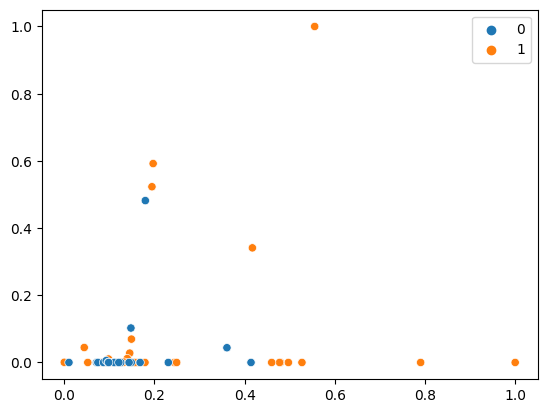

In [218]:
sns.scatterplot(
    x=pj[:, 0], y=pj[:, 1], hue=processed['Schizo_filtered0.3_normalized'][1].values
)

In [223]:
processed['Schizo_filtered0.3_normalized'][0].shape

(72, 106)

In [226]:
graph = mapper.map(pj, processed['Schizo_filtered0.3_normalized'][0], cover=km.Cover(n_cubes=100))

Mapping on data shaped (72, 106) using lens shaped (72, 2)

Creating 10000 hypercubes.

Created 0 edges and 0 nodes in 0:00:00.136496.


In [227]:
graph

{'nodes': defaultdict(list, {}),
 'links': defaultdict(list, {}),
 'simplices': [],
 'meta_data': {'projection': '[0, 1]',
  'n_cubes': 100,
  'perc_overlap': 0.5,
  'clusterer': 'DBSCAN(min_samples=3)',
  'scaler': 'MinMaxScaler()'},
 'meta_nodes': defaultdict(list, {})}

In [228]:
mapper.visualize(graph, path_html="make_circles_keplermapper_output.html",
                 title="make_circles(n_samples=5000, noise=0.03, factor=0.3)")

Exception: Visualize requires a mapper with more than 0 nodes. 
It is possible that the constructed mapper could have been constructed with bad parameters. This can occasionally happens when using the default clustering algorithm. Try changing `eps` or `min_samples` in the DBSCAN clustering algorithm.

# UMAP

In [183]:
# name = 'Schizo_filtered0.6_normalized'
# best_result, best_f1, total_metrics = autoNeuro.experiments.run(
#     processed[name][0],
#     processed[name][1],
#     experiment_name=name,
#     repeats=1,
#     topN=1,
#     scaling=False,
#     plot_density=False,
# )